Audio Classifier
=========================

## Important information

* Choose a group name/number and rename the file with it.
* Be sure to enter the names of every member in the group in the cell below.
* Use the power of number and work together as a team.
* You can employ the use of the HPC (high perfomance computer) provided your server account has been established.
* The tutor is always available to give more explanation and assistance whenever/wherever required, but make sure you have made effort yourself.
* Please remove all test codes.
* The solutions to the tasks should be turn in on Friday 13th Dec, end of the day (12am). 
* A notebook submission is required per group, no multiple submissions from same group. Submit by attaching only the .ipynb file please, not zip and I don't need other files (e.g the data) I already have them.

Group Leaders

    Member SOH Ornella Lucresse
    Member SIKASOTE Claytone
    Member KEMAJOU Mbakam Charlesquin
    

This task is inspired by the Audio Classifier Tutorial (found [here](https://pytorch.org/tutorials/beginner/audio_classifier_tutorial.html?highlight=audio))
**Author**: `Winston Herring <https://github.com/winston6>`_

This tutorial will show you how to correctly format an audio dataset and
then train/test an audio classifier network on the dataset. First, let’s
import the common torch packages as well as ``torch``, ``torchaudio``, ``pandas``,
and ``numpy``. ``torchaudio`` is available `here <https://github.com/pytorch/audio>`_
and can be installed by following the
instructions on the website but I encountered a lot of trouble installing it, this ` conda install -c pytorch torchaudio-cpu ` rather worked for me.

If you have a CUDA GPU use that. Running
the network on a GPU will greatly decrease the training/testing runtime.




1: Importing the Dataset
---------------------

We will use the UrbanSound8K dataset to train our network. It is
available for free `here <https://urbansounddataset.weebly.com/>`_ and contains
10 audio classes with over 8000 audio samples! Once you have downloaded
the compressed dataset, extract it to your current working directory.
First, we will look at the csv file that provides information about the
individual sound files. ``pandas`` allows us to open the csv file and
use ``.iloc()`` to access the data within it.




The 10 audio classes in the UrbanSound8K dataset are air_conditioner,
car_horn, children_playing, dog_bark, drilling, enginge_idling,
gun_shot, jackhammer, siren, and street_music. Let’s play a couple files
and see what they sound like. The first file is street music and the
second is an air conditioner.




2: Formatting the Data
-------------------

Now that we know the format of the csv file entries, we can construct
our dataset. We will create a rapper class for our dataset using
``torch.utils.data.Dataset`` that will handle loading the files and
performing some formatting steps. The UrbanSound8K dataset is separated
into 10 folders. We will use the data from 9 of these folders to train
our network and then use the 10th folder to test the network. The rapper
class will store the file names, labels, and folder numbers of the audio
files in the inputted folder list when initialized. The actual loading
and formatting steps will happen in the access function ``__getitem__``.

In ``__getitem__``, we use ``torchaudio.load()`` to convert the wav
files to tensors. ``torchaudio.load()`` returns a tuple containing the
newly created tensor along with the sampling frequency of the audio file
(44.1kHz for UrbanSound8K). The dataset uses two channels for audio so
we will use ``torchaudio.transforms.DownmixMono()`` (not available in the latest version of `torchaudio`) to convert the audio
data to one channel. Next, we need to format the audio data. The network
we will make takes an input size of 32,000, while most of the audio
files have well over 100,000 samples. The UrbanSound8K audio is sampled
at 44.1kHz, so 32,000 samples only covers around 700 milliseconds. By
downsampling the audio to aproximately 8kHz, we can represent 4 seconds
with the 32,000 samples. This downsampling is achieved by taking every
fifth sample of the original audio tensor. Not every audio tensor is
long enough to handle the downsampling so these tensors will need to be
padded with zeros. The minimum length that won’t require padding is
160,000 samples.




3: Define the Network
------------------

For this task we want to closely reproduce the achitectures described in https://arxiv.org/pdf/1610.00087.pdf. You task is to read extensively the paper and reproduce the achitectures <font color='green'> M3, M5, M11 and M18. The M34-res is a bonus.</font>
While attempting to reproduce the architectures endeavour to read through the common [pitfalls](https://urbansounddataset.weebly.com/urbansound8k.html#10foldCV) to get it right.

We will use the same optimization technique used in the paper, an Adam
optimizer with weight decay set to 0.0001. At first, we will train with
a learning rate of 0.01, but we will use a ``scheduler`` to decrease it
to 0.001 during training.




4: Training and Testing the Network
--------------------------------

You can define a training function that will feed our training data into the model and perform the backward pass and optimization steps. You can also make one for testing the networks accuracy and set the model to ``eval()`` mode and then run inference on the test dataset. Calling ``eval()`` sets the training variable in all modules in the network to false. Certain layers like batch normalization and dropout layers behave differently during training so this step is crucial for getting correct results.




Finally, we can train and test the network. Train the network for as many epochs as time allows you. The network will be tested after each epoch to see how the accuracy varies during the training.

Conclusion
----------

If trained on 9 folders, the network should be about 40% accurate by the end of the training process for the least possible epochs. Training on less folders will result in a lower overall accuracy. Greater accuracies can be achieved using deeper CNNs at the expense of a larger memory footprint.

For more advanced audio applications, such as speech recognition,
recurrent neural networks (RNNs) are commonly used. There are also other
data preprocessing methods, such as finding the mel frequency cepstral
coefficients (MFCC), that can reduce the size of the dataset.




In [1]:
# To install torchaudio
!pip3 install torchaudio 

     |████████████████████████████████| 2.7MB 53kB/s 
     |████████████████████████████████| 773.1MB 23kB/s 
ERROR: torchvision 0.4.2 has requirement torch==1.3.1, but you'll have torch 1.3.0 which is incompatible.
  Found existing installation: torch 1.3.1
    Uninstalling torch-1.3.1:
      Successfully uninstalled torch-1.3.1


<font color='red'>GOOD NEWS</font> : Solutions to the first two section have been given to you freely. <font color='blue'>You are welcome</font>. 

In [0]:
import os
import glob 
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchaudio

In [0]:
#rapper for the UrbanSound8K dataset

In [0]:
class AudioDataset(Dataset):
    """
    A rapper class for the UrbanSound8K dataset.
    """

    def __init__(self, file_path, audio_paths, folds):
        """
        Args:
            file_path(string): path to the audio csv file
            root_dir(string): directory with all the audio folds
            folds: integer corresponding to audio fold number or list of fold number if more than one fold is needed
        """
        self.audio_file = pd.read_csv(file_path)
        self.folds = folds
        self.audio_paths = glob.glob(audio_paths + '/*' + str(self.folds) + '/*')
    
    

    def __len__(self):
        return len(self.audio_paths)

    def __getitem__(self, idx):
        
        audio_path = self.audio_paths[idx]
        audio, rate = torchaudio.load(audio_path, normalization=True)
        audio = audio.mean(0, keepdim=True)
        c, n = audio.shape
        zero_need = 160000 - n
        audio_new = F.pad(audio, (zero_need //2, zero_need //2), 'constant', 0)
        audio_new = audio_new[:,::5]
        
        #Getting the corresponding label
        audio_name = audio_path.split(sep='/')[-1]
        labels = self.audio_file.loc[self.audio_file.slice_file_name == audio_name].iloc[0,-2]
        
        return audio_new, labels

In [0]:
AudioDataset?

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
file_path = '/content/drive/My Drive/UrbanSound8K/metadata/UrbanSound8K.csv'
audio_paths = '/content/drive/My Drive/UrbanSound8K/audio'


In [7]:


audio_train = AudioDataset(file_path, audio_paths, [1,2,3,4,5,6,7,8,9])
print(len(audio_train))
audio_train[0][0].shape

7895


torch.Size([1, 32000])

In [8]:
# Data visualisation

audio_train = AudioDataset(file_path, audio_paths, 1)
from IPython.display import Audio
Audio(audio_train[0][0], rate = 5600)
#print(len(audio_train))

In [9]:
audio_test = AudioDataset(file_path, audio_paths, 10)
print(len(audio_test))

837


In [9]:
# Read csv file with pandas

import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/My Drive/UrbanSound8K/metadata/UrbanSound8K.csv")
data.shape

(8732, 8)

In [11]:
# first elements in the csv file

data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [13]:
# To look at the class distribution of each fold

appended = []
for i in range(1,11):
    appended.append(data[data.fold == i]['class'].value_counts())
    
class_distribution = pd.DataFrame(appended)
class_distribution = class_distribution.reset_index()
class_distribution['index'] = ["fold"+str(x) for x in range(1,11)]
class_distribution

,index,jackhammer,street_music,drilling,air_conditioner,children_playing,dog_bark,engine_idling,siren,car_horn,gun_shot
0,fold1,120,100,100,100,100,100,96,86,36,35
1,fold2,120,100,100,100,100,100,100,91,42,35
2,fold3,120,100,100,100,100,100,107,119,43,36
3,fold4,120,100,100,100,100,100,107,166,59,38
4,fold5,120,100,100,100,100,100,107,71,98,40
5,fold6,68,100,100,100,100,100,107,74,28,46
6,fold7,76,100,100,100,100,100,106,77,28,51
7,fold8,78,100,100,100,100,100,88,80,30,30
8,fold9,82,100,100,100,100,100,89,82,32,31
9,fold10,96,100,100,100,100,100,93,83,33,32


In [14]:
# We can see that the data is not balanced. Let's look at the total balance

data['class'].value_counts(normalize=True)

drilling            0.114521
children_playing    0.114521
jackhammer          0.114521
air_conditioner     0.114521
engine_idling       0.114521
dog_bark            0.114521
street_music        0.114521
siren               0.106390
car_horn            0.049130
gun_shot            0.042831
Name: class, dtype: float64

In [0]:
# To plot one sound file

import os
import struct
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
import IPython.display as ipd

def path_class(filename):
    excerpt = data[data['slice_file_name'] == filename]
    path_name = os.path.join('audio_paths', 'fold'+str(excerpt.fold.values[0]), filename)
    return path_name, excerpt['class'].values[0]

def wav_plotter(full_path, class_label):   
    rate, wav_sample = wav.read(full_path)
    wave_file = open(full_path,"rb")
    riff_fmt = wave_file.read(36)
    bit_depth_string = riff_fmt[-2:]
    bit_depth = struct.unpack("H",bit_depth_string)[0]
    print('sampling rate: ',rate,'Hz')
    print('bit depth: ',bit_depth)
    print('number of channels: ',wav_sample.shape[1])
    print('duration: ',wav_sample.shape[0]/rate,' second')
    print('number of samples: ',len(wav_sample))
    print('class: ',class_label)
    plt.figure(figsize=(12, 4))
    plt.plot(wav_sample) 
    return ipd.Audio(full_path)



sampling rate:  44100 Hz
bit depth:  16
number of channels:  2
duration:  0.97  second
number of samples:  42777
class:  children_playing


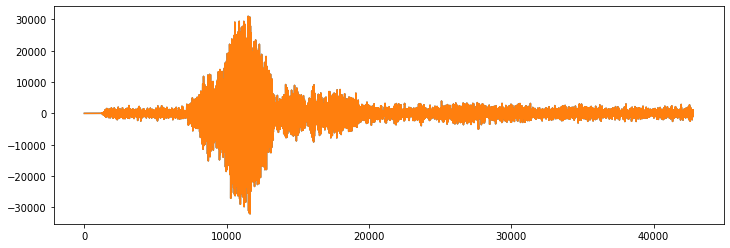

In [11]:
fullpath, label = path_class('100263-2-0-117.wav')
wav_plotter('/content/drive/My Drive/UrbanSound8K/audio/fold6/204919-3-3-0.wav',label)
#wav_plotter('/home/ornella/AMMI/data/UrbanSound8K/audio/fold2/4201-3-0-0.wav',label)

In [17]:
# To slice one sound file

data[data.slice_file_name == '100652-3-0-1.wav']

,slice_file_name,fsID,start,end,salience,fold,classID,class
15,100652-3-0-1.wav,100652,0.5,4.5,1,2,3,dog_bark


In [4]:
# Uploading the data online

!wget https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz


--2019-12-13 20:59:22--  https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz
Resolving zenodo.org (zenodo.org)... 188.184.95.95
Connecting to zenodo.org (zenodo.org)|188.184.95.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6023741708 (5.6G) [application/octet-stream]
Saving to: ‘UrbanSound8K.tar.gz’

UrbanSound8K.tar.gz 100%[===================>]   5.61G  9.75MB/s    in 8m 24s  

2019-12-13 21:07:47 (11.4 MB/s) - ‘UrbanSound8K.tar.gz’ saved [6023741708/6023741708]



In [0]:
# To unzip the data

!tar -xf UrbanSound8K.tar.gz

In [0]:
class AudioDataset(Dataset):
    """
    A rapper class for the UrbanSound8K dataset.
    """

    def __init__(self, file_path, audio_paths, folds):
        """
        Args:
            file_path(string): path to the audio csv file
            root_dir(string): directory with all the audio folds
            folds: integer corresponding to audio fold number or list of fold number if more than one fold is needed
        """
        self.audio_file = pd.read_csv(file_path)
        self.folds = folds
        self.audio_paths = glob.glob(audio_paths + '/*' + str(self.folds) + '/*')
    
    

    def __len__(self):
        return len(self.audio_paths)

    def __getitem__(self, idx):
        
        audio_path = self.audio_paths[idx]
        audio, rate = torchaudio.load(audio_path, normalization=True)
        audio = audio.mean(0, keepdim=True)
        c, n = audio.shape
        zero_need = 160000 - n
        audio_new = F.pad(audio, (zero_need //2, zero_need //2), 'constant', 0)
        audio_new = audio_new[:,::5]
        
        #Getting the corresponding label
        audio_name = audio_path.split(sep='/')[-1]
        labels = self.audio_file.loc[self.audio_file.slice_file_name == audio_name].iloc[0,-2]
        
        return audio_new, labels

In [7]:
file_path = '/content/UrbanSound8K/metadata/UrbanSound8K.csv'
audio_paths = '/content/UrbanSound8K/audio'

audio_train = AudioDataset(file_path, audio_paths, [1,2,3,4,5,6,7,8,9])
print(len(audio_train))
audio_train[0][0].shape

7895


torch.Size([1, 32000])

# To define the five architectures of the paper

# Let's first define the different useful functions

In [0]:
## # Accuracy definition 

def accuracy(output, target, topk=(1,)):
    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)

        _, pred = output.topk(maxk, 1, True, True)
        pred = pred.t()
        correct = pred.eq(target.view(1, -1).expand_as(pred)) 

        res = []
        for k in topk:
            correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
            res.append(correct_k.mul_(100.0 / batch_size))
        return res

In [0]:
def plot_loss_acc(train_loss,test_loss,train_acc,test_acc,i,name):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(16,4))

    plt.subplot(121)
    p1 = plt.plot(train_loss)
    p2 = plt.plot(test_loss)
    plt.legend((p1[0], p2[0]), ('train', 'test'))
    plt.title("train and test loss for " +name+ " model, using floder {} for test".format(i))

    plt.subplot(122)
    p1 = plt.plot(train_acc)
    p2 = plt.plot(test_acc)
    plt.legend((p1[0], p2[0]), ('train', 'test'))
    plt.title("train and test accuracy for " +name+ " model, using floder {} for test".format(i))

    plt.show() 

In [0]:
import torch.nn as nn
import torch.nn.functional as F
criterion = nn.CrossEntropyLoss()


In [0]:
# To build a training loop

def train_plot(model,trainloader,testloader,i_,name_,criterion):
    test_loss = []
    train_loss = []
    top_1_train = []
    top_1_test = []
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-4) 
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    # loop over the dataset multiple times
    for epoch in range(10):
        print('Epoch: {}'.format(epoch))

        # train for 1 epoch on the train set
        correct = 0
        av_loss1 = 0
        av_loss2 = 0
        for i, (batch, targets) in enumerate(trainloader):


            # batch and targets to cuda 
            batch = batch.cuda()
            targets = targets.cuda()
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward 
            output = model(batch)
            loss = criterion(output, targets)
            # backward
            loss.backward()
            av_loss1 += loss.item()
            # gradient step 
            optimizer.step()
            # compute accuracy 
            correct += accuracy(output, targets)[0].item() #* batch.size(0) / 100 #(output.argmax(1) == targets).float().mean().item() #accuracy(output, targets)[0].item() * batch.size(0) / 100
            #print('correct classify {} and index {}'.format(correct,i))
        top_1tr = 100. * correct / len(trainloader.dataset)
        #print('Train accuracy: {:.2f}%'.format(top_1tr))

        # evaluate on the test set  
        with torch.no_grad():
            #M3.eval()
            correct = 0
            for i, (batch, targets) in enumerate(testloader):

                # batch and targets to cuda 
                batch = batch.cuda()
                targets = targets.cuda()
                # forward 
                output = model(batch)
                loss = criterion(output, targets)
                av_loss2 += loss.item()
                # compute accuracy 
                correct += accuracy(output, targets)[0].item()
        scheduler.step()
        top_1test = 100. * correct / len(testloader.dataset)
        #print('Test accuracy: {:.2f}%'.format(top_1test)) 

        top_1_train.append(top_1tr)
        train_loss.append(av_loss1 / len(trainloader))
        print('Train accuracy: {:.2f}%'.format( top_1tr))     
        #top_1 = correct2 / len(testloader.dataset) * 100
        top_1_test.append(top_1test)
        test_loss.append(av_loss2 / len(testloader))
        print('Test accuracy: {:.2f}%'.format(top_1test))

    plot_loss_acc(train_loss,test_loss,top_1_train,top_1_test,i_,name_)
    return train_loss,test_loss,top_1_train,top_1_test


In [0]:
# to apply cross validation

def model_train_plot(model,name,criterion):
    floder = [1,2,3,4,5,6,7,8,9,10]
    acc_train=[]
    acc_test=[]
    loss_test=[]
    loss_train=[]
    for i in range(1,11):
        print('CrossValdation {}, Model : {}'.format(i,name))
        floder_train = floder[:]
        floder_train.remove(i)
        
        train_loader = AudioDataset(file_path,audio_paths,folds = floder_train)
        test_loader = AudioDataset(file_path,audio_paths,folds =i)
        
        trainloader = DataLoader(train_loader, batch_size = 128, shuffle = False, num_workers = 10)
        testloader = DataLoader(test_loader, batch_size = 128, shuffle = False, num_workers = 10)
        
        loss_train,loss_test,acc_train,acc_test=train_plot(model,trainloader,testloader,i,name,criterion)
        print('AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET')
        print('loss train {}'.format(np.mean(loss_train)))
        print('loss test {}'.format(np.mean(loss_test)))
        print('Accuracy train {}'.format(np.mean(acc_train)))
        print('Accuracy test {}'.format(np.mean(acc_test)))
        print('\n')

# M3 model

In [0]:
### To build the M3 model

import torch.nn as nn
import torch
import torch.nn as nn
M3 = nn.Sequential(
    # conv1
    nn.Conv1d(1, 256, kernel_size=80, stride=4, padding=38),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.MaxPool1d(4),
    
    #conv2
    nn.Conv1d(256, 256, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.MaxPool1d(4),
    nn.AvgPool1d(500),
    # nn.AdaptiveAvgPool1d(1), same for Avg
    nn.Flatten(),
    nn.Linear(256,10),
    nn.Softmax(1)

)
audio = torch.zeros(1,32000)
M3(audio.unsqueeze(0)).shape
print('M3 parameters: {}'.format(sum([i.nelement() for i in M3.parameters()])))

CrossValdation 1, Model : M3
Epoch: 0
Train accuracy: 18.82%
Test accuracy: 21.70%
Epoch: 1
Train accuracy: 21.05%
Test accuracy: 25.97%
Epoch: 2
Train accuracy: 21.73%
Test accuracy: 24.31%
Epoch: 3
Train accuracy: 22.83%
Test accuracy: 24.27%
Epoch: 4
Train accuracy: 23.56%
Test accuracy: 23.19%
Epoch: 5
Train accuracy: 24.64%
Test accuracy: 24.67%
Epoch: 6
Train accuracy: 25.75%
Test accuracy: 29.12%
Epoch: 7
Train accuracy: 27.70%
Test accuracy: 30.68%
Epoch: 8
Train accuracy: 28.52%
Test accuracy: 29.67%
Epoch: 9
Train accuracy: 29.67%
Test accuracy: 30.79%


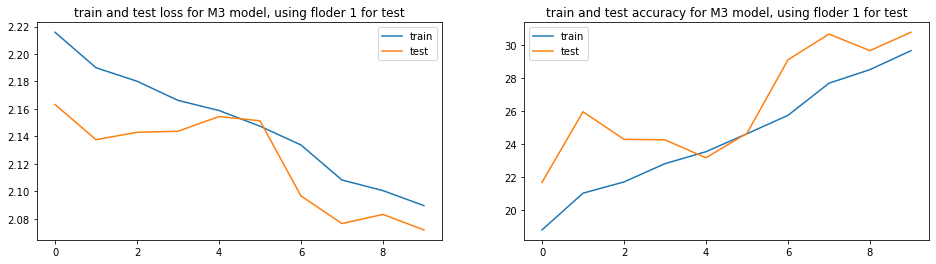

loss train 2.1490379516629208
loss test 2.1221152646201
Accuracy train 24.427419059384704
Accuracy test 26.436190872804133
CrossValdation 2, Model : M3
Epoch: 0
Train accuracy: 27.48%
Test accuracy: 26.10%
Epoch: 1
Train accuracy: 27.83%
Test accuracy: 27.42%
Epoch: 2
Train accuracy: 28.71%
Test accuracy: 27.50%
Epoch: 3
Train accuracy: 29.98%
Test accuracy: 27.76%
Epoch: 4
Train accuracy: 30.81%
Test accuracy: 27.20%
Epoch: 5
Train accuracy: 32.01%
Test accuracy: 27.76%
Epoch: 6
Train accuracy: 32.47%
Test accuracy: 28.01%
Epoch: 7
Train accuracy: 32.79%
Test accuracy: 28.58%
Epoch: 8
Train accuracy: 34.53%
Test accuracy: 29.54%
Epoch: 9
Train accuracy: 35.08%
Test accuracy: 29.91%


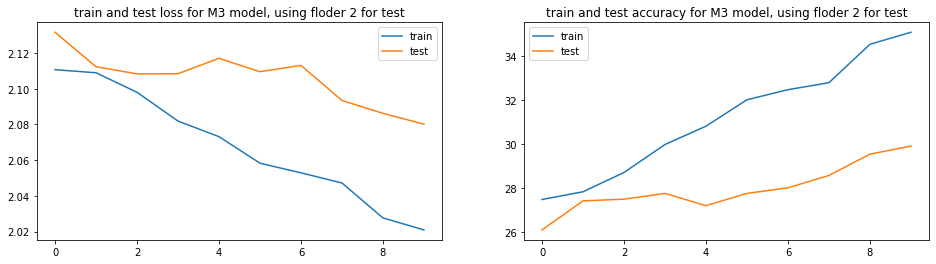

loss train 2.0679494207905185
loss test 2.105993434361049
Accuracy train 31.17009991592804
Accuracy test 27.977782391213083
CrossValdation 3, Model : M3
Epoch: 0
Train accuracy: 33.02%
Test accuracy: 30.89%
Epoch: 1
Train accuracy: 33.21%
Test accuracy: 29.10%
Epoch: 2
Train accuracy: 32.20%
Test accuracy: 30.30%
Epoch: 3
Train accuracy: 32.67%
Test accuracy: 28.59%
Epoch: 4
Train accuracy: 33.59%
Test accuracy: 29.02%
Epoch: 5
Train accuracy: 33.95%
Test accuracy: 27.78%
Epoch: 6
Train accuracy: 33.99%
Test accuracy: 29.81%
Epoch: 7
Train accuracy: 33.88%
Test accuracy: 32.58%
Epoch: 8
Train accuracy: 35.72%
Test accuracy: 32.30%
Epoch: 9
Train accuracy: 36.14%
Test accuracy: 32.13%


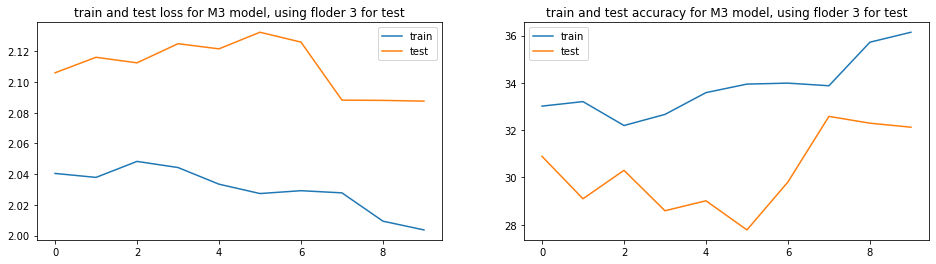

loss train 2.0302131689962795
loss test 2.1103424310684202
Accuracy train 33.8353555053148
Accuracy test 30.251048402528504
CrossValdation 4, Model : M3
Epoch: 0
Train accuracy: 32.37%
Test accuracy: 29.53%
Epoch: 1
Train accuracy: 33.87%
Test accuracy: 29.52%
Epoch: 2
Train accuracy: 35.35%
Test accuracy: 32.69%
Epoch: 3
Train accuracy: 34.13%
Test accuracy: 32.03%
Epoch: 4
Train accuracy: 34.98%
Test accuracy: 30.17%
Epoch: 5
Train accuracy: 34.51%
Test accuracy: 30.93%
Epoch: 6
Train accuracy: 35.30%
Test accuracy: 30.27%
Epoch: 7
Train accuracy: 34.80%
Test accuracy: 33.64%
Epoch: 8
Train accuracy: 36.59%
Test accuracy: 34.61%
Epoch: 9
Train accuracy: 37.13%
Test accuracy: 35.38%


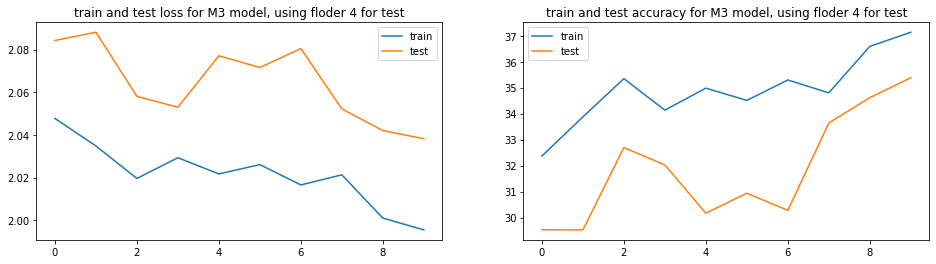

loss train 2.0213556367842878
loss test 2.064490096271038
Accuracy train 34.90241098268431
Accuracy test 31.878122926962497
CrossValdation 5, Model : M3
Epoch: 0
Train accuracy: 34.78%
Test accuracy: 35.16%
Epoch: 1
Train accuracy: 34.33%
Test accuracy: 33.07%
Epoch: 2
Train accuracy: 34.68%
Test accuracy: 34.34%
Epoch: 3
Train accuracy: 34.81%
Test accuracy: 31.48%
Epoch: 4
Train accuracy: 34.59%
Test accuracy: 34.35%
Epoch: 5
Train accuracy: 34.95%
Test accuracy: 35.11%
Epoch: 6
Train accuracy: 35.06%
Test accuracy: 33.42%
Epoch: 7
Train accuracy: 36.60%
Test accuracy: 36.11%
Epoch: 8
Train accuracy: 37.56%
Test accuracy: 35.66%
Epoch: 9
Train accuracy: 37.92%
Test accuracy: 35.66%


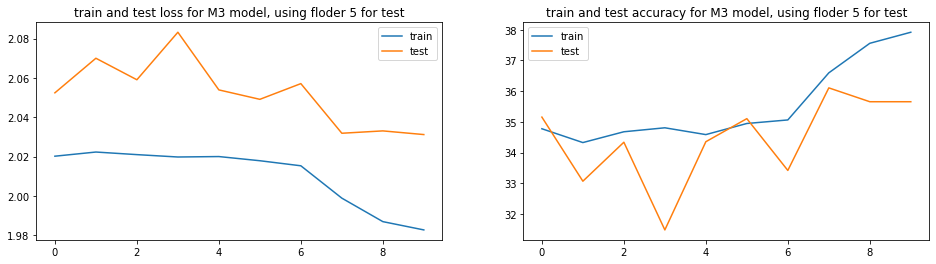

loss train 2.0105384734810374
loss test 2.0521214663982392
Accuracy train 35.52672209526833
Accuracy test 34.435096153846146
CrossValdation 6, Model : M3
Epoch: 0
Train accuracy: 36.48%
Test accuracy: 27.46%
Epoch: 1
Train accuracy: 35.81%
Test accuracy: 23.63%
Epoch: 2
Train accuracy: 36.56%
Test accuracy: 30.14%
Epoch: 3
Train accuracy: 37.16%
Test accuracy: 29.80%
Epoch: 4
Train accuracy: 37.05%
Test accuracy: 26.32%
Epoch: 5
Train accuracy: 36.47%
Test accuracy: 26.79%
Epoch: 6
Train accuracy: 36.97%
Test accuracy: 26.13%
Epoch: 7
Train accuracy: 36.69%
Test accuracy: 29.39%
Epoch: 8
Train accuracy: 37.84%
Test accuracy: 29.23%
Epoch: 9
Train accuracy: 38.32%
Test accuracy: 28.47%


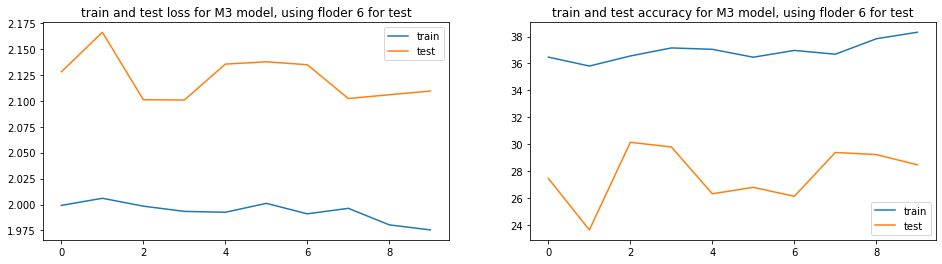

loss train 1.993403285934079
loss test 2.1220000028610233
Accuracy train 36.934302346054345
Accuracy test 27.735108599193477
CrossValdation 7, Model : M3
Epoch: 0
Train accuracy: 34.98%
Test accuracy: 34.75%
Epoch: 1
Train accuracy: 36.31%
Test accuracy: 35.99%
Epoch: 2
Train accuracy: 36.38%
Test accuracy: 35.69%
Epoch: 3
Train accuracy: 36.85%
Test accuracy: 34.85%
Epoch: 4
Train accuracy: 37.29%
Test accuracy: 33.88%
Epoch: 5
Train accuracy: 36.61%
Test accuracy: 36.50%
Epoch: 6
Train accuracy: 37.31%
Test accuracy: 34.82%
Epoch: 7
Train accuracy: 37.08%
Test accuracy: 37.01%
Epoch: 8
Train accuracy: 38.70%
Test accuracy: 36.36%
Epoch: 9
Train accuracy: 38.94%
Test accuracy: 36.81%


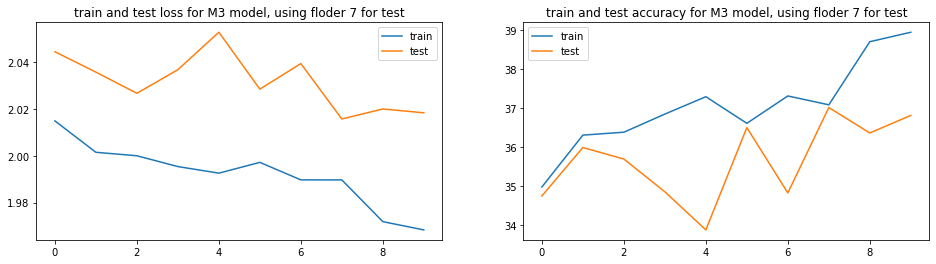

loss train 1.9921001603526451
loss test 2.031699046066829
Accuracy train 37.0448734417788
Accuracy test 35.66713915804406
CrossValdation 8, Model : M3
Epoch: 0
Train accuracy: 36.37%
Test accuracy: 42.72%
Epoch: 1
Train accuracy: 36.53%
Test accuracy: 39.12%
Epoch: 2
Train accuracy: 36.34%
Test accuracy: 41.58%
Epoch: 3
Train accuracy: 36.55%
Test accuracy: 40.00%
Epoch: 4
Train accuracy: 37.64%
Test accuracy: 40.19%
Epoch: 5
Train accuracy: 37.10%
Test accuracy: 41.10%
Epoch: 6
Train accuracy: 36.46%
Test accuracy: 40.23%
Epoch: 7
Train accuracy: 38.03%
Test accuracy: 41.10%
Epoch: 8
Train accuracy: 38.91%
Test accuracy: 41.49%
Epoch: 9
Train accuracy: 39.24%
Test accuracy: 41.39%


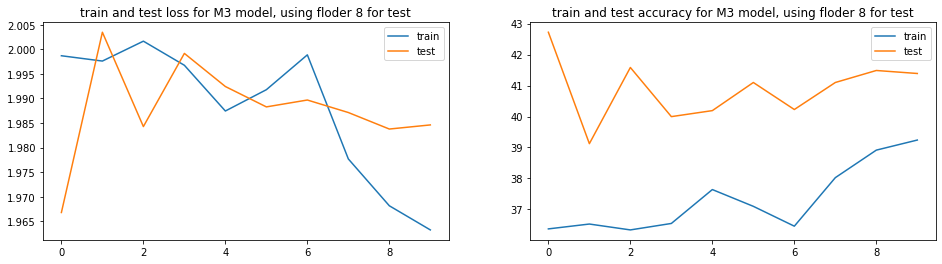

loss train 1.9881971786099097
loss test 1.9879698378699164
Accuracy train 37.31676041042145
Accuracy test 40.8908922559866
CrossValdation 9, Model : M3
Epoch: 0
Train accuracy: 36.60%
Test accuracy: 40.12%
Epoch: 1
Train accuracy: 36.85%
Test accuracy: 39.83%
Epoch: 2
Train accuracy: 36.47%
Test accuracy: 41.20%
Epoch: 3
Train accuracy: 37.53%
Test accuracy: 39.35%
Epoch: 4
Train accuracy: 36.90%
Test accuracy: 39.80%
Epoch: 5
Train accuracy: 36.79%
Test accuracy: 39.70%
Epoch: 6
Train accuracy: 37.49%
Test accuracy: 39.03%
Epoch: 7
Train accuracy: 38.78%
Test accuracy: 42.60%
Epoch: 8
Train accuracy: 39.63%
Test accuracy: 42.03%
Epoch: 9
Train accuracy: 39.86%
Test accuracy: 42.41%


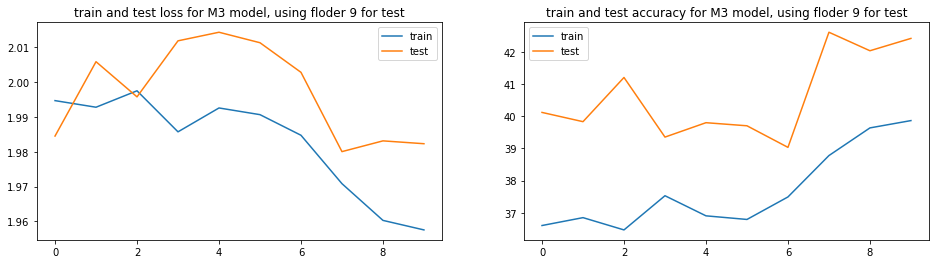

loss train 1.9827382610690207
loss test 1.9971912026405334
Accuracy train 37.69114913092291
Accuracy test 40.60712819005929
CrossValdation 10, Model : M3
Epoch: 0
Train accuracy: 37.46%
Test accuracy: 39.40%
Epoch: 1
Train accuracy: 37.53%
Test accuracy: 36.20%
Epoch: 2
Train accuracy: 37.83%
Test accuracy: 33.69%
Epoch: 3
Train accuracy: 37.50%
Test accuracy: 35.25%
Epoch: 4
Train accuracy: 37.86%
Test accuracy: 35.44%
Epoch: 5
Train accuracy: 38.19%
Test accuracy: 38.73%
Epoch: 6
Train accuracy: 38.18%
Test accuracy: 36.90%
Epoch: 7
Train accuracy: 37.80%
Test accuracy: 42.09%
Epoch: 8
Train accuracy: 39.18%
Test accuracy: 42.74%
Epoch: 9
Train accuracy: 39.75%
Test accuracy: 43.18%


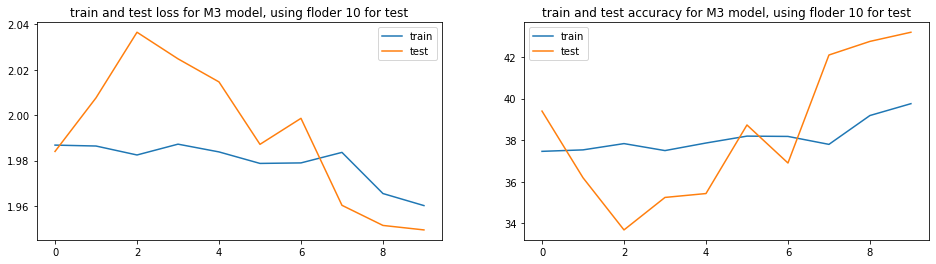

loss train 1.9793941263229615
loss test 1.9914635028157914
Accuracy train 38.13009332870668
Accuracy test 38.361508359191234


In [87]:
# To train the M3 model

model = M3.cuda()
model_train_plot(model,"M3",criterion)

# M5 model

In [91]:
# Let's define the M5 model

M5 = nn.Sequential(
    # conv1
    nn.Conv1d(1, 128, kernel_size=80, stride=4, padding=38),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    nn.MaxPool1d(4),
    
    #conv2
    nn.Conv1d(128, 128, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    nn.MaxPool1d(4),
    # conv3
    nn.Conv1d(128, 256, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.MaxPool1d(4),
    #conv4
    nn.Conv1d(256, 512, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    nn.MaxPool1d(4),
    
    nn.AdaptiveAvgPool1d(1),
    #nn.AvgPool1d(500),
    # nn.AdaptiveAvgPool1d(1), same for Avg
    nn.Flatten(),
    nn.Linear(512,10),
    nn.Softmax(1)

)
audio = torch.zeros(1,32000)
M5(audio.unsqueeze(0)).shape


torch.Size([1, 10])

CrossValdation 1, Model : M5
Epoch: 0
Train accuracy: 20.66%
Test accuracy: 20.21%
Epoch: 1
Train accuracy: 23.76%
Test accuracy: 23.20%
Epoch: 2
Train accuracy: 25.99%
Test accuracy: 29.09%
Epoch: 3
Train accuracy: 25.05%
Test accuracy: 32.13%
Epoch: 4
Train accuracy: 24.56%
Test accuracy: 30.26%
Epoch: 5
Train accuracy: 24.40%
Test accuracy: 26.20%
Epoch: 6
Train accuracy: 26.63%
Test accuracy: 30.65%
Epoch: 7
Train accuracy: 28.57%
Test accuracy: 33.00%
Epoch: 8
Train accuracy: 29.96%
Test accuracy: 33.38%
Epoch: 9
Train accuracy: 30.70%
Test accuracy: 34.99%


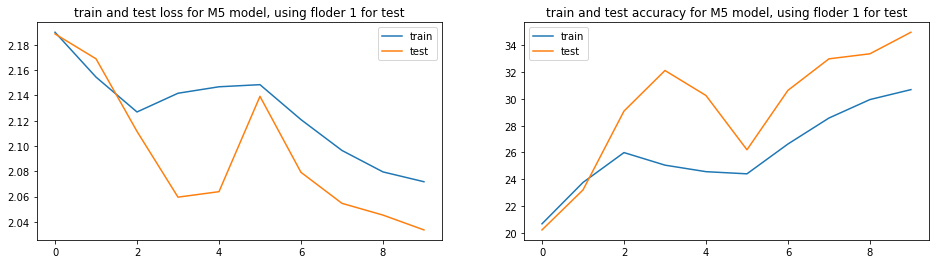

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 2.127748469857202
loss test 2.094502365589142
Accuracy train 26.029311319692823
Accuracy test 29.310362423681585


CrossValdation 2, Model : M5
Epoch: 0
Train accuracy: 29.51%
Test accuracy: 24.28%
Epoch: 1
Train accuracy: 31.00%
Test accuracy: 26.26%
Epoch: 2
Train accuracy: 31.88%
Test accuracy: 28.60%
Epoch: 3
Train accuracy: 31.42%
Test accuracy: 29.36%
Epoch: 4
Train accuracy: 31.75%
Test accuracy: 31.49%
Epoch: 5
Train accuracy: 32.26%
Test accuracy: 30.01%
Epoch: 6
Train accuracy: 33.27%
Test accuracy: 29.67%
Epoch: 7
Train accuracy: 32.88%
Test accuracy: 30.90%
Epoch: 8
Train accuracy: 35.72%
Test accuracy: 31.58%
Epoch: 9
Train accuracy: 36.57%
Test accuracy: 31.50%


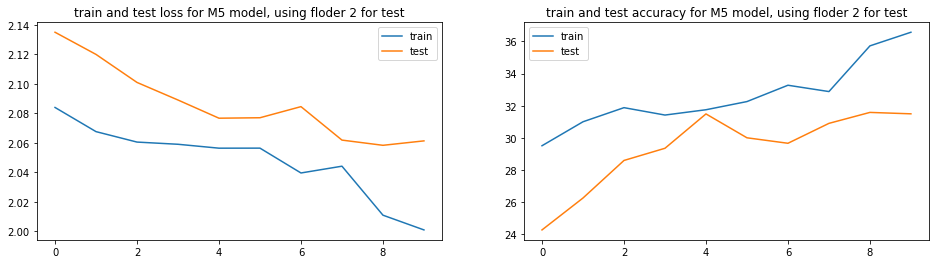

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 2.047901819213744
loss test 2.08641687631607
Accuracy train 32.62600746524389
Accuracy test 29.364911693710468


CrossValdation 3, Model : M5
Epoch: 0
Train accuracy: 35.35%
Test accuracy: 29.63%
Epoch: 1
Train accuracy: 34.57%
Test accuracy: 29.02%
Epoch: 2
Train accuracy: 35.11%
Test accuracy: 30.86%
Epoch: 3
Train accuracy: 36.07%
Test accuracy: 31.15%
Epoch: 4
Train accuracy: 37.00%
Test accuracy: 28.56%
Epoch: 5
Train accuracy: 37.14%
Test accuracy: 30.06%
Epoch: 6
Train accuracy: 37.83%
Test accuracy: 29.27%
Epoch: 7
Train accuracy: 38.41%
Test accuracy: 30.78%
Epoch: 8
Train accuracy: 40.84%
Test accuracy: 34.49%
Epoch: 9
Train accuracy: 41.34%
Test accuracy: 34.79%


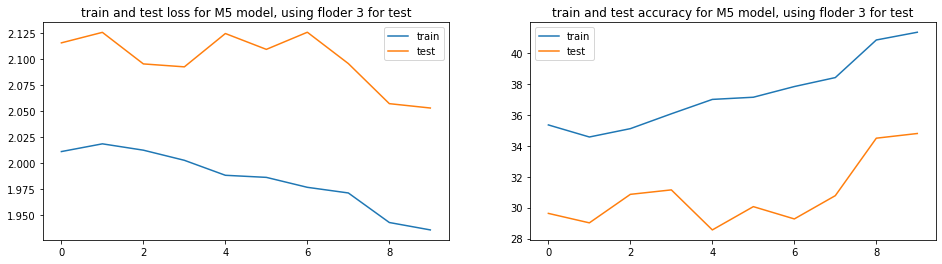

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 1.984288555481395
loss test 2.0995088890194893
Accuracy train 37.36662892903166
Accuracy test 30.86061273523279


CrossValdation 4, Model : M5
Epoch: 0
Train accuracy: 37.47%
Test accuracy: 32.46%
Epoch: 1
Train accuracy: 37.87%
Test accuracy: 34.65%
Epoch: 2
Train accuracy: 34.53%
Test accuracy: 29.73%
Epoch: 3
Train accuracy: 37.44%
Test accuracy: 28.71%
Epoch: 4
Train accuracy: 37.35%
Test accuracy: 33.09%
Epoch: 5
Train accuracy: 37.91%
Test accuracy: 34.94%
Epoch: 6
Train accuracy: 38.94%
Test accuracy: 33.97%
Epoch: 7
Train accuracy: 38.35%
Test accuracy: 36.02%
Epoch: 8
Train accuracy: 41.28%
Test accuracy: 36.74%
Epoch: 9
Train accuracy: 42.39%
Test accuracy: 35.99%


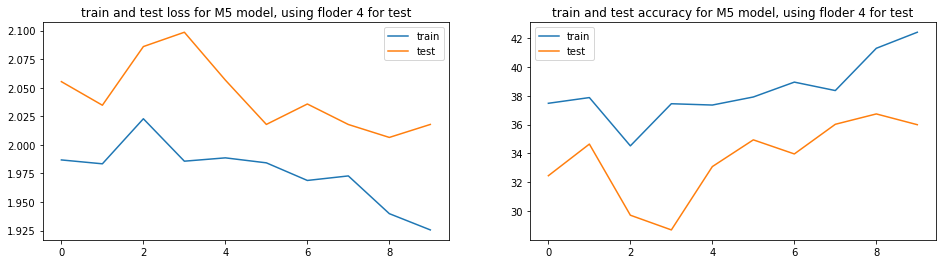

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 1.9758506335195947
loss test 2.0426724806427954
Accuracy train 38.35348899405737
Accuracy test 33.630688445736666


CrossValdation 5, Model : M5
Epoch: 0
Train accuracy: 39.00%
Test accuracy: 39.68%
Epoch: 1
Train accuracy: 38.12%
Test accuracy: 37.99%
Epoch: 2
Train accuracy: 38.00%
Test accuracy: 40.92%
Epoch: 3
Train accuracy: 38.39%
Test accuracy: 36.76%
Epoch: 4
Train accuracy: 38.55%
Test accuracy: 40.33%
Epoch: 5
Train accuracy: 40.32%
Test accuracy: 40.92%
Epoch: 6
Train accuracy: 40.61%
Test accuracy: 40.23%
Epoch: 7
Train accuracy: 41.29%
Test accuracy: 41.93%
Epoch: 8
Train accuracy: 42.81%
Test accuracy: 41.77%
Epoch: 9
Train accuracy: 43.59%
Test accuracy: 42.60%


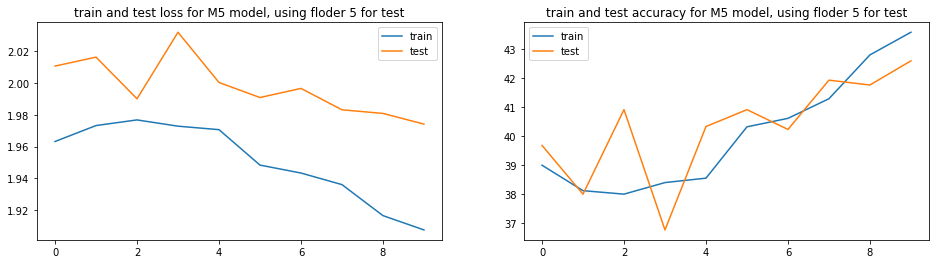

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 1.950836759317117
loss test 1.9975878566503524
Accuracy train 40.06724270017652
Accuracy test 40.31283386752136


CrossValdation 6, Model : M5
Epoch: 0
Train accuracy: 39.17%
Test accuracy: 46.56%
Epoch: 1
Train accuracy: 39.30%
Test accuracy: 48.84%
Epoch: 2
Train accuracy: 41.30%
Test accuracy: 44.51%
Epoch: 3
Train accuracy: 39.36%
Test accuracy: 45.36%
Epoch: 4
Train accuracy: 39.56%
Test accuracy: 43.43%
Epoch: 5
Train accuracy: 39.98%
Test accuracy: 38.68%
Epoch: 6
Train accuracy: 38.72%
Test accuracy: 44.09%
Epoch: 7
Train accuracy: 41.54%
Test accuracy: 46.27%
Epoch: 8
Train accuracy: 43.40%
Test accuracy: 46.65%
Epoch: 9
Train accuracy: 43.94%
Test accuracy: 46.27%


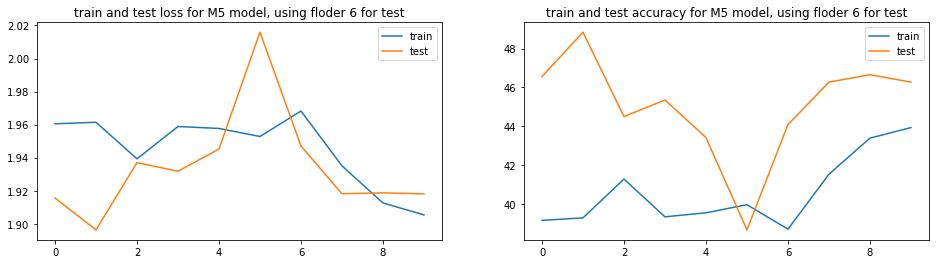

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 1.9451738884372098
loss test 1.9343732867922103
Accuracy train 40.62715359894119
Accuracy test 45.06655274735331


CrossValdation 7, Model : M5
Epoch: 0
Train accuracy: 40.26%
Test accuracy: 41.19%
Epoch: 1
Train accuracy: 41.78%
Test accuracy: 39.05%
Epoch: 2
Train accuracy: 41.93%
Test accuracy: 43.35%
Epoch: 3
Train accuracy: 42.07%
Test accuracy: 40.49%
Epoch: 4
Train accuracy: 40.58%
Test accuracy: 32.88%
Epoch: 5
Train accuracy: 40.57%
Test accuracy: 42.42%
Epoch: 6
Train accuracy: 41.60%
Test accuracy: 42.59%
Epoch: 7
Train accuracy: 40.94%
Test accuracy: 44.83%
Epoch: 8
Train accuracy: 42.98%
Test accuracy: 46.24%
Epoch: 9
Train accuracy: 44.08%
Test accuracy: 47.05%


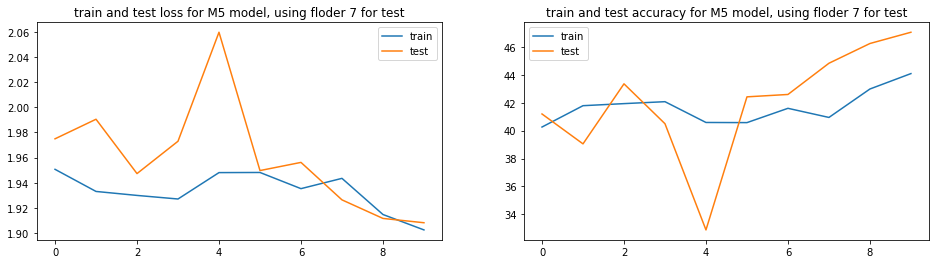

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 1.9332418451386115
loss test 1.9597086719104222
Accuracy train 41.68058348994694
Accuracy test 42.009035215172965


CrossValdation 8, Model : M5
Epoch: 0
Train accuracy: 41.82%
Test accuracy: 43.91%
Epoch: 1
Train accuracy: 42.20%
Test accuracy: 43.88%
Epoch: 2
Train accuracy: 43.16%
Test accuracy: 42.07%
Epoch: 3
Train accuracy: 42.87%
Test accuracy: 47.38%
Epoch: 4
Train accuracy: 43.13%
Test accuracy: 46.46%
Epoch: 5
Train accuracy: 42.68%
Test accuracy: 42.43%
Epoch: 6
Train accuracy: 43.61%
Test accuracy: 44.99%
Epoch: 7
Train accuracy: 44.11%
Test accuracy: 45.35%
Epoch: 8
Train accuracy: 45.41%
Test accuracy: 43.88%
Epoch: 9
Train accuracy: 46.02%
Test accuracy: 43.79%


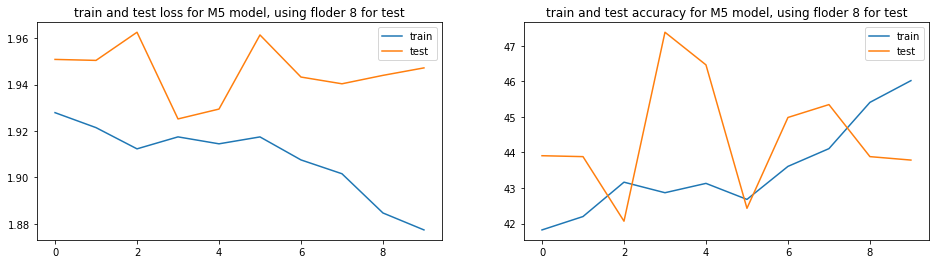

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 1.9082493691675122
loss test 1.9454456312315807
Accuracy train 43.50118428686788
Accuracy test 44.414016496454806


CrossValdation 9, Model : M5
Epoch: 0
Train accuracy: 43.84%
Test accuracy: 40.12%
Epoch: 1
Train accuracy: 43.24%
Test accuracy: 35.23%
Epoch: 2
Train accuracy: 42.54%
Test accuracy: 38.74%
Epoch: 3
Train accuracy: 43.07%
Test accuracy: 41.20%
Epoch: 4
Train accuracy: 42.65%
Test accuracy: 40.66%
Epoch: 5
Train accuracy: 43.95%
Test accuracy: 39.92%
Epoch: 6
Train accuracy: 43.92%
Test accuracy: 39.80%
Epoch: 7
Train accuracy: 44.64%
Test accuracy: 41.42%
Epoch: 8
Train accuracy: 45.83%
Test accuracy: 43.12%
Epoch: 9
Train accuracy: 46.25%
Test accuracy: 43.40%


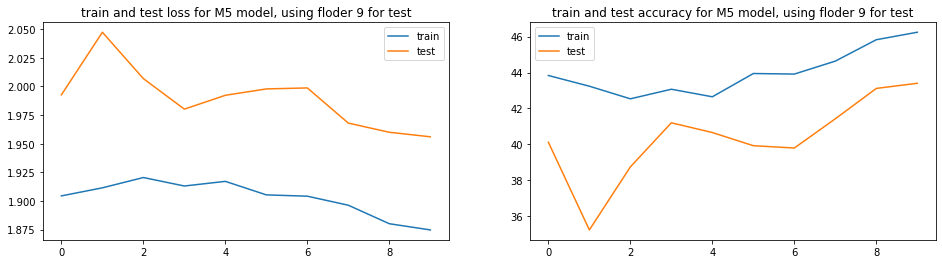

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 1.9026684391883113
loss test 1.9899730750492641
Accuracy train 43.9903638000257
Accuracy test 40.36139177341087


CrossValdation 10, Model : M5
Epoch: 0
Train accuracy: 42.87%
Test accuracy: 48.61%
Epoch: 1
Train accuracy: 43.43%
Test accuracy: 47.92%
Epoch: 2
Train accuracy: 43.25%
Test accuracy: 47.60%
Epoch: 3
Train accuracy: 43.62%
Test accuracy: 47.94%
Epoch: 4
Train accuracy: 44.06%
Test accuracy: 48.41%
Epoch: 5
Train accuracy: 44.05%
Test accuracy: 49.28%
Epoch: 6
Train accuracy: 43.87%
Test accuracy: 46.28%
Epoch: 7
Train accuracy: 44.31%
Test accuracy: 48.89%
Epoch: 8
Train accuracy: 46.18%
Test accuracy: 49.16%
Epoch: 9
Train accuracy: 46.66%
Test accuracy: 49.13%


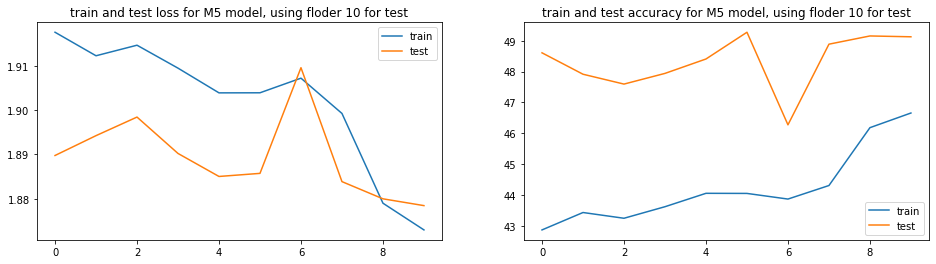

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 1.9020314101249944
loss test 1.8895232983997894
Accuracy train 44.23039823970589
Accuracy test 48.32000071572289




In [92]:
# To train the M5 model

model = M5.cuda()
model_train_plot(model,"M5",criterion)

# M11 model

In [93]:
# to build M11 model

M11 = nn.Sequential(
    #conv1
    nn.Conv1d(1,64,kernel_size=80, stride=4, padding=38),
    nn.BatchNorm1d(64),
    nn.ReLU(),
 
    nn.MaxPool1d(4),
    
    #conv2 1
    nn.Conv1d(64, 64, kernel_size=3, padding=1),
    nn.BatchNorm1d(64),
    nn.ReLU(), 
    
    #conv2 2
    nn.Conv1d(64, 64, kernel_size=3, padding=1),
    nn.BatchNorm1d(64),
    nn.ReLU(), 
    
    nn.MaxPool1d(4),
    
    #conv3 1
    nn.Conv1d(64, 128, kernel_size=3, padding=1),
    nn.BatchNorm1d(128),
    nn.ReLU(),  
     
    #conv3 2
    nn.Conv1d(128, 128, kernel_size=3, padding=1),
    nn.BatchNorm1d(128),
    nn.ReLU(),  
    nn.MaxPool1d(4),

    #conv4  1
    nn.Conv1d(128, 256, kernel_size=3, padding=2),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    
    #conv4  2
    nn.Conv1d(256, 256, kernel_size=3, padding=2),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    
    #conv4  3
    nn.Conv1d(256, 256, kernel_size=3, padding=2),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    
    nn.MaxPool1d(4),
    
    #conv5  1
    nn.Conv1d(256, 512, kernel_size=3, padding=2),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    
    #conv5  2
    nn.Conv1d(512, 512, kernel_size=3, padding=2),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    
    
    
#     #nn.AvgPool1d(500),
     nn.AdaptiveAvgPool1d(1), #same for Avg
     nn.Flatten(),
     nn.Linear(512,10),
     nn.Softmax(1)
    
 )
audio = torch.zeros(1,32000)
M11(audio.unsqueeze(0)).shape

torch.Size([1, 10])

CrossValdation 1, Model : M11
Epoch: 0
Train accuracy: 19.09%
Test accuracy: 25.20%
Epoch: 1
Train accuracy: 18.01%
Test accuracy: 17.45%
Epoch: 2
Train accuracy: 21.04%
Test accuracy: 14.82%
Epoch: 3
Train accuracy: 20.30%
Test accuracy: 25.12%
Epoch: 4
Train accuracy: 21.28%
Test accuracy: 23.23%
Epoch: 5
Train accuracy: 23.76%
Test accuracy: 24.96%
Epoch: 6
Train accuracy: 23.78%
Test accuracy: 24.33%
Epoch: 7
Train accuracy: 25.30%
Test accuracy: 27.08%
Epoch: 8
Train accuracy: 26.73%
Test accuracy: 27.08%
Epoch: 9
Train accuracy: 27.53%
Test accuracy: 27.86%


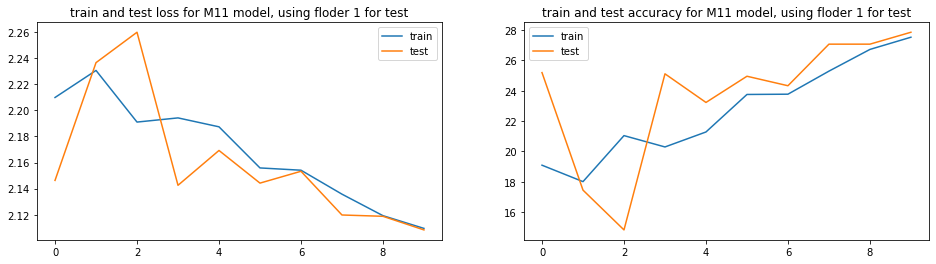

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 2.1687313259511756
loss test 2.1598787307739262
Accuracy train 22.681736104050422
Accuracy test 23.713300449332014


CrossValdation 2, Model : M11
Epoch: 0
Train accuracy: 25.25%
Test accuracy: 25.98%
Epoch: 1
Train accuracy: 25.33%
Test accuracy: 21.64%
Epoch: 2
Train accuracy: 25.57%
Test accuracy: 21.20%
Epoch: 3
Train accuracy: 27.45%
Test accuracy: 26.35%
Epoch: 4
Train accuracy: 28.03%
Test accuracy: 32.55%
Epoch: 5
Train accuracy: 29.49%
Test accuracy: 27.08%
Epoch: 6
Train accuracy: 31.95%
Test accuracy: 28.85%
Epoch: 7
Train accuracy: 33.11%
Test accuracy: 31.50%
Epoch: 8
Train accuracy: 34.78%
Test accuracy: 30.99%
Epoch: 9
Train accuracy: 35.23%
Test accuracy: 32.04%


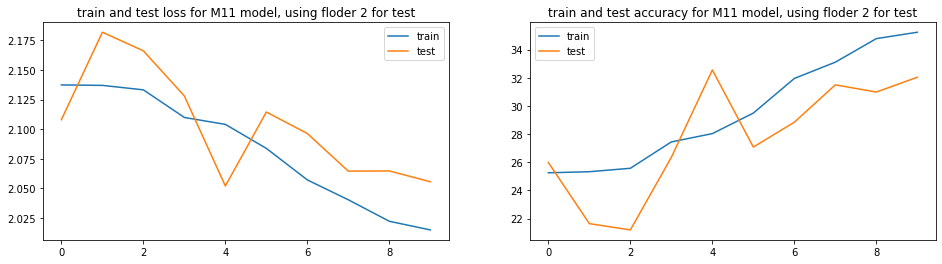

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 2.08405973315239
loss test 2.103228281225477
Accuracy train 29.620016524525454
Accuracy test 27.817074822949934


CrossValdation 3, Model : M11
Epoch: 0
Train accuracy: 32.65%
Test accuracy: 26.69%
Epoch: 1
Train accuracy: 33.13%
Test accuracy: 24.47%
Epoch: 2
Train accuracy: 32.72%
Test accuracy: 26.43%
Epoch: 3
Train accuracy: 32.69%
Test accuracy: 29.05%
Epoch: 4
Train accuracy: 34.57%
Test accuracy: 28.75%
Epoch: 5
Train accuracy: 35.29%
Test accuracy: 28.56%
Epoch: 6
Train accuracy: 35.11%
Test accuracy: 30.06%
Epoch: 7
Train accuracy: 37.27%
Test accuracy: 35.42%
Epoch: 8
Train accuracy: 38.74%
Test accuracy: 34.63%
Epoch: 9
Train accuracy: 40.06%
Test accuracy: 35.20%


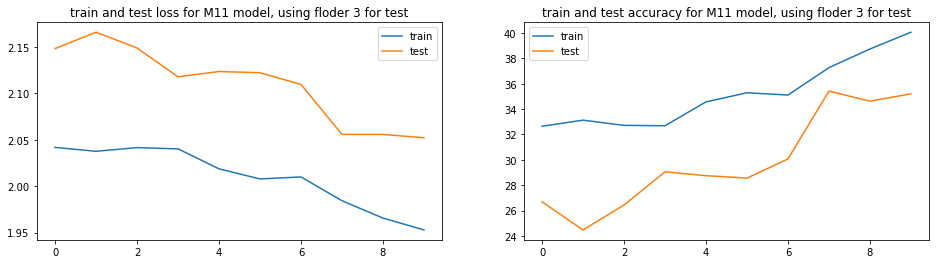

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 2.0100021833279094
loss test 2.1098397940397264
Accuracy train 35.222182231720815
Accuracy test 29.92602516380516


CrossValdation 4, Model : M11
Epoch: 0
Train accuracy: 35.53%
Test accuracy: 28.66%
Epoch: 1
Train accuracy: 36.99%
Test accuracy: 32.14%
Epoch: 2
Train accuracy: 37.99%
Test accuracy: 30.37%
Epoch: 3
Train accuracy: 38.79%
Test accuracy: 31.85%
Epoch: 4
Train accuracy: 38.15%
Test accuracy: 33.50%
Epoch: 5
Train accuracy: 37.71%
Test accuracy: 32.44%
Epoch: 6
Train accuracy: 39.90%
Test accuracy: 34.21%
Epoch: 7
Train accuracy: 40.78%
Test accuracy: 36.97%
Epoch: 8
Train accuracy: 42.47%
Test accuracy: 35.83%
Epoch: 9
Train accuracy: 43.28%
Test accuracy: 35.55%


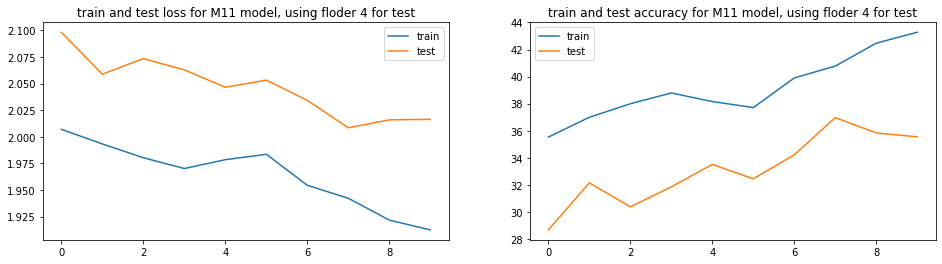

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 1.9643235919905493
loss test 2.0468610927462576
Accuracy train 39.15908122179706
Accuracy test 33.15199873182509


CrossValdation 5, Model : M11
Epoch: 0
Train accuracy: 38.70%
Test accuracy: 37.39%
Epoch: 1
Train accuracy: 40.79%
Test accuracy: 39.20%
Epoch: 2
Train accuracy: 39.97%
Test accuracy: 42.89%
Epoch: 3
Train accuracy: 39.69%
Test accuracy: 39.50%
Epoch: 4
Train accuracy: 39.49%
Test accuracy: 41.38%
Epoch: 5
Train accuracy: 40.94%
Test accuracy: 42.84%
Epoch: 6
Train accuracy: 41.07%
Test accuracy: 35.44%
Epoch: 7
Train accuracy: 40.92%
Test accuracy: 40.36%
Epoch: 8
Train accuracy: 43.25%
Test accuracy: 41.82%
Epoch: 9
Train accuracy: 44.18%
Test accuracy: 42.17%


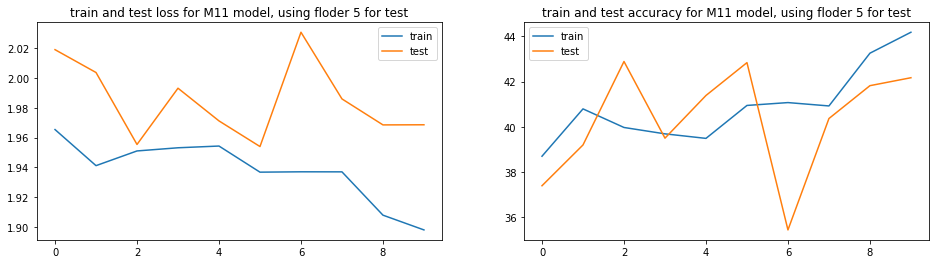

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 1.938091941544267
loss test 1.9850361227989197
Accuracy train 40.899275813486824
Accuracy test 40.29780982905983


CrossValdation 6, Model : M11
Epoch: 0
Train accuracy: 41.43%
Test accuracy: 46.12%
Epoch: 1
Train accuracy: 40.00%
Test accuracy: 45.55%
Epoch: 2
Train accuracy: 40.90%
Test accuracy: 44.57%
Epoch: 3
Train accuracy: 40.99%
Test accuracy: 42.99%
Epoch: 4
Train accuracy: 41.79%
Test accuracy: 41.56%
Epoch: 5
Train accuracy: 40.25%
Test accuracy: 42.04%
Epoch: 6
Train accuracy: 41.86%
Test accuracy: 43.90%
Epoch: 7
Train accuracy: 43.32%
Test accuracy: 44.54%
Epoch: 8
Train accuracy: 44.84%
Test accuracy: 44.32%
Epoch: 9
Train accuracy: 45.87%
Test accuracy: 44.44%


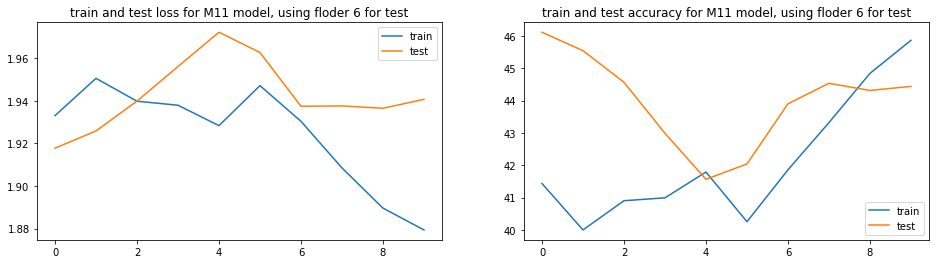

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 1.9244162171117722
loss test 1.9425996252468654
Accuracy train 42.12482270556585
Accuracy test 44.00250626073863


CrossValdation 7, Model : M11
Epoch: 0
Train accuracy: 41.80%
Test accuracy: 43.40%
Epoch: 1
Train accuracy: 42.27%
Test accuracy: 43.35%
Epoch: 2
Train accuracy: 42.87%
Test accuracy: 43.94%
Epoch: 3
Train accuracy: 42.01%
Test accuracy: 45.14%
Epoch: 4
Train accuracy: 42.42%
Test accuracy: 42.88%
Epoch: 5
Train accuracy: 41.94%
Test accuracy: 44.19%
Epoch: 6
Train accuracy: 42.19%
Test accuracy: 42.11%
Epoch: 7
Train accuracy: 43.96%
Test accuracy: 43.02%
Epoch: 8
Train accuracy: 45.74%
Test accuracy: 42.98%
Epoch: 9
Train accuracy: 46.49%
Test accuracy: 43.44%


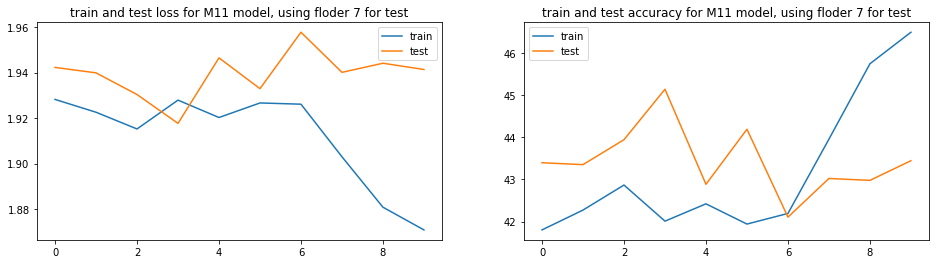

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 1.9121460458924695
loss test 1.9392609936850413
Accuracy train 43.170298578046314
Accuracy test 43.445544322521414


CrossValdation 8, Model : M11
Epoch: 0
Train accuracy: 42.62%
Test accuracy: 49.77%
Epoch: 1
Train accuracy: 43.38%
Test accuracy: 49.37%
Epoch: 2
Train accuracy: 43.18%
Test accuracy: 46.33%
Epoch: 3
Train accuracy: 43.04%
Test accuracy: 46.63%
Epoch: 4
Train accuracy: 43.96%
Test accuracy: 49.70%
Epoch: 5
Train accuracy: 44.16%
Test accuracy: 47.80%
Epoch: 6
Train accuracy: 44.06%
Test accuracy: 46.34%
Epoch: 7
Train accuracy: 45.38%
Test accuracy: 48.06%
Epoch: 8
Train accuracy: 46.82%
Test accuracy: 49.45%
Epoch: 9
Train accuracy: 47.36%
Test accuracy: 48.16%


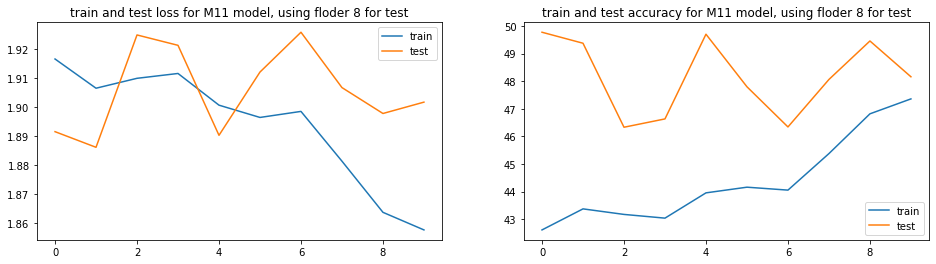

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 1.894247077357384
loss test 1.905779606955392
Accuracy train 44.393725937856075
Accuracy test 48.16211875555829


CrossValdation 9, Model : M11
Epoch: 0
Train accuracy: 44.93%
Test accuracy: 49.50%
Epoch: 1
Train accuracy: 43.36%
Test accuracy: 50.87%
Epoch: 2
Train accuracy: 44.55%
Test accuracy: 45.70%
Epoch: 3
Train accuracy: 43.31%
Test accuracy: 47.97%
Epoch: 4
Train accuracy: 45.46%
Test accuracy: 45.96%
Epoch: 5
Train accuracy: 44.57%
Test accuracy: 44.10%
Epoch: 6
Train accuracy: 44.96%
Test accuracy: 46.02%
Epoch: 7
Train accuracy: 45.27%
Test accuracy: 49.88%
Epoch: 8
Train accuracy: 47.33%
Test accuracy: 49.69%
Epoch: 9
Train accuracy: 48.11%
Test accuracy: 48.48%


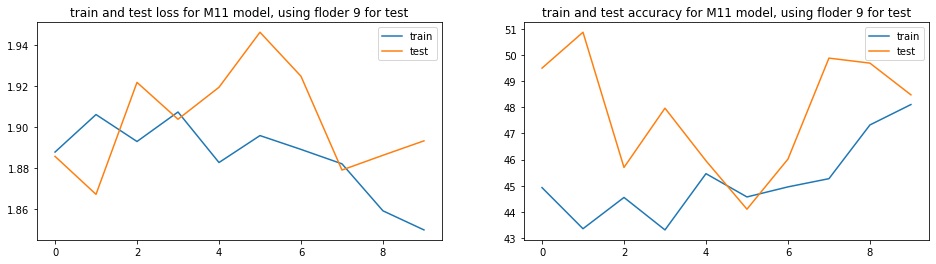

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 1.8852716069067674
loss test 1.9027693935803007
Accuracy train 45.18483572984477
Accuracy test 47.81645700043323


CrossValdation 10, Model : M11
Epoch: 0
Train accuracy: 45.47%
Test accuracy: 45.38%
Epoch: 1
Train accuracy: 45.42%
Test accuracy: 45.20%
Epoch: 2
Train accuracy: 45.46%
Test accuracy: 43.53%
Epoch: 3
Train accuracy: 44.76%
Test accuracy: 45.94%
Epoch: 4
Train accuracy: 46.16%
Test accuracy: 44.70%
Epoch: 5
Train accuracy: 45.06%
Test accuracy: 43.58%
Epoch: 6
Train accuracy: 45.05%
Test accuracy: 42.86%
Epoch: 7
Train accuracy: 44.39%
Test accuracy: 46.05%
Epoch: 8
Train accuracy: 47.10%
Test accuracy: 46.97%
Epoch: 9
Train accuracy: 48.14%
Test accuracy: 47.53%


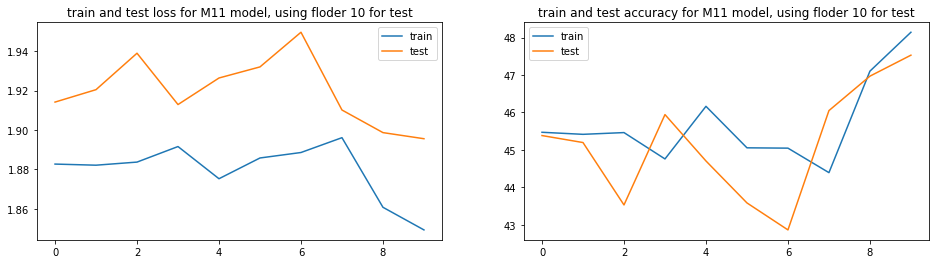

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 1.8796273798711838
loss test 1.9198755179132736
Accuracy train 45.701359150302494
Accuracy test 45.175413088416825




In [94]:
# To train M11 model
model = M11.cuda()
model_train_plot(model,'M11',criterion)


# M18 model

In [13]:
# To build M18 model

M18 = nn.Sequential(
    #conv1
    nn.Conv1d(1,64,kernel_size=80, stride=4, padding=38),
    nn.BatchNorm1d(64),
    nn.ReLU(),
 
    nn.MaxPool1d(4),
    
    #conv2 1
    nn.Conv1d(64, 64, kernel_size=3, padding=1),
    nn.BatchNorm1d(64),
    nn.ReLU(), 
    
    #conv2 2
    nn.Conv1d(64, 64, kernel_size=3, padding=1),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    #conv2 3
    nn.Conv1d(64, 64, kernel_size=3, padding=1),
    nn.BatchNorm1d(64),
    nn.ReLU(), 
    
    #conv2 4
    nn.Conv1d(64, 64, kernel_size=3, padding=1),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.MaxPool1d(4),
    
    
    #conv3 1
    nn.Conv1d(64, 128, kernel_size=3, padding=1),
    nn.BatchNorm1d(128),
    nn.ReLU(),  
     
    #conv3 2
    nn.Conv1d(128, 128, kernel_size=3, padding=1),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    
    #conv3 3
    nn.Conv1d(128, 128, kernel_size=3, padding=1),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    
    #conv3 4
    nn.Conv1d(128, 128, kernel_size=3, padding=1),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    
    nn.MaxPool1d(4),
    
    #conv4  1
    nn.Conv1d(128, 256, kernel_size=3, padding=2),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    
    #conv4  2
    nn.Conv1d(256, 256, kernel_size=3, padding=2),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    
    #conv4  3
    nn.Conv1d(256, 256, kernel_size=3, padding=2),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    
    #conv4  4
    nn.Conv1d(256, 256, kernel_size=3, padding=1),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    
    nn.MaxPool1d(4),
    
    #conv5  1
    nn.Conv1d(256, 512, kernel_size=3, padding=2),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    
    #conv5  2
    nn.Conv1d(512, 512, kernel_size=3, padding=2),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    
    #conv5  3
    nn.Conv1d(512, 512, kernel_size=3, padding=2),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    
    #conv5  4
    nn.Conv1d(512, 512, kernel_size=3, padding=2),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    
    
    nn.AdaptiveAvgPool1d(1), #same for Avg
    nn.Flatten(),
    nn.Linear(512,10),
    nn.Softmax(1)
    )
audio = torch.zeros(1,32000)
M18(audio.unsqueeze(0)).shape

torch.Size([1, 10])

CrossValdation 1, Model : M18
Epoch: 0
Train accuracy: 17.94%
Test accuracy: 17.97%
Epoch: 1
Train accuracy: 14.21%
Test accuracy: 11.96%
Epoch: 2
Train accuracy: 15.45%
Test accuracy: 18.80%
Epoch: 3
Train accuracy: 19.09%
Test accuracy: 25.28%
Epoch: 4
Train accuracy: 17.86%
Test accuracy: 15.14%
Epoch: 5
Train accuracy: 17.24%
Test accuracy: 19.80%
Epoch: 6
Train accuracy: 20.28%
Test accuracy: 14.43%
Epoch: 7
Train accuracy: 19.59%
Test accuracy: 19.97%
Epoch: 8
Train accuracy: 21.36%
Test accuracy: 19.88%
Epoch: 9
Train accuracy: 22.64%
Test accuracy: 20.10%


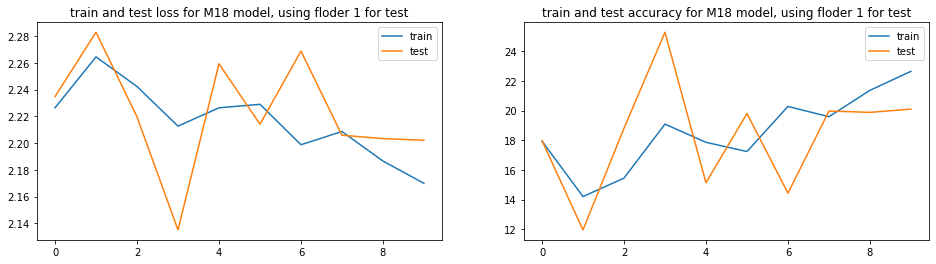

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 2.2165088515350786
loss test 2.222576434271676
Accuracy train 18.564976525317626
Accuracy test 18.33271964991898


CrossValdation 2, Model : M18
Epoch: 0
Train accuracy: 15.58%
Test accuracy: 15.11%
Epoch: 1
Train accuracy: 20.48%
Test accuracy: 24.22%
Epoch: 2
Train accuracy: 20.47%
Test accuracy: 21.20%
Epoch: 3
Train accuracy: 22.51%
Test accuracy: 21.04%
Epoch: 4
Train accuracy: 22.75%
Test accuracy: 22.32%
Epoch: 5
Train accuracy: 24.37%
Test accuracy: 20.07%
Epoch: 6
Train accuracy: 22.46%
Test accuracy: 18.02%
Epoch: 7
Train accuracy: 22.21%
Test accuracy: 23.94%
Epoch: 8
Train accuracy: 24.62%
Test accuracy: 24.12%
Epoch: 9
Train accuracy: 25.19%
Test accuracy: 23.84%


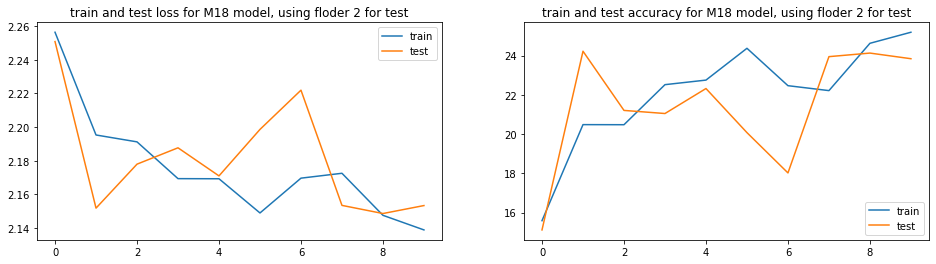

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 2.1759246383943864
loss test 2.181539760317121
Accuracy train 22.064812436266738
Accuracy test 21.38877149100776


CrossValdation 3, Model : M18
Epoch: 0
Train accuracy: 23.56%
Test accuracy: 20.65%
Epoch: 1
Train accuracy: 26.48%
Test accuracy: 23.85%
Epoch: 2
Train accuracy: 27.12%
Test accuracy: 18.76%
Epoch: 3
Train accuracy: 22.61%
Test accuracy: 17.97%
Epoch: 4
Train accuracy: 24.49%
Test accuracy: 21.34%
Epoch: 5
Train accuracy: 25.59%
Test accuracy: 18.34%
Epoch: 6
Train accuracy: 27.74%
Test accuracy: 22.17%
Epoch: 7
Train accuracy: 28.91%
Test accuracy: 22.39%
Epoch: 8
Train accuracy: 30.13%
Test accuracy: 23.73%
Epoch: 9
Train accuracy: 31.12%
Test accuracy: 22.68%


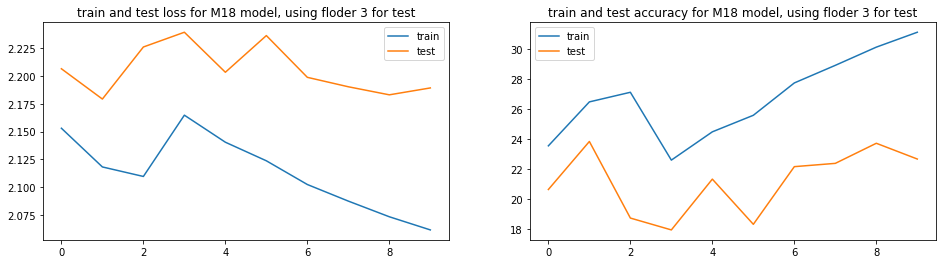

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 2.1134939840582545
loss test 2.2050758421421053
Accuracy train 26.775574398908084
Accuracy test 21.189130917110962


CrossValdation 4, Model : M18
Epoch: 0
Train accuracy: 29.89%
Test accuracy: 22.88%
Epoch: 1
Train accuracy: 29.36%
Test accuracy: 23.79%
Epoch: 2
Train accuracy: 28.27%
Test accuracy: 22.06%
Epoch: 3
Train accuracy: 29.48%
Test accuracy: 23.28%
Epoch: 4
Train accuracy: 31.02%
Test accuracy: 22.42%
Epoch: 5
Train accuracy: 31.54%
Test accuracy: 24.26%
Epoch: 6
Train accuracy: 33.11%
Test accuracy: 25.34%
Epoch: 7
Train accuracy: 33.94%
Test accuracy: 26.08%
Epoch: 8
Train accuracy: 35.78%
Test accuracy: 27.00%
Epoch: 9
Train accuracy: 36.57%
Test accuracy: 27.26%


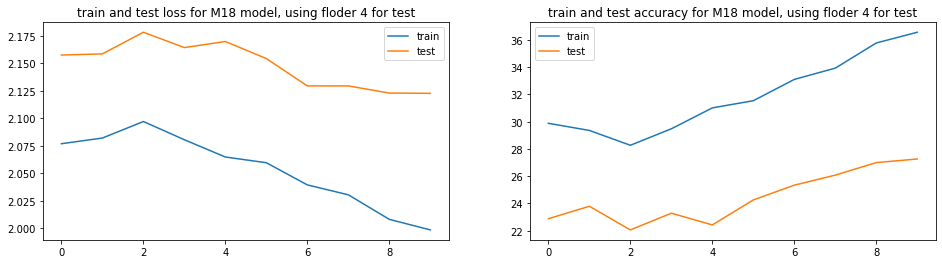

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 2.0538911049483253
loss test 2.1488506704568864
Accuracy train 31.894916503874718
Accuracy test 24.437526818477746


CrossValdation 5, Model : M18
Epoch: 0
Train accuracy: 32.63%
Test accuracy: 32.72%
Epoch: 1
Train accuracy: 32.76%
Test accuracy: 30.37%
Epoch: 2
Train accuracy: 33.24%
Test accuracy: 29.03%
Epoch: 3
Train accuracy: 32.25%
Test accuracy: 29.98%
Epoch: 4
Train accuracy: 32.58%
Test accuracy: 28.56%
Epoch: 5
Train accuracy: 32.91%
Test accuracy: 30.01%
Epoch: 6
Train accuracy: 31.66%
Test accuracy: 31.27%
Epoch: 7
Train accuracy: 33.87%
Test accuracy: 32.59%
Epoch: 8
Train accuracy: 35.13%
Test accuracy: 33.19%
Epoch: 9
Train accuracy: 36.09%
Test accuracy: 34.05%


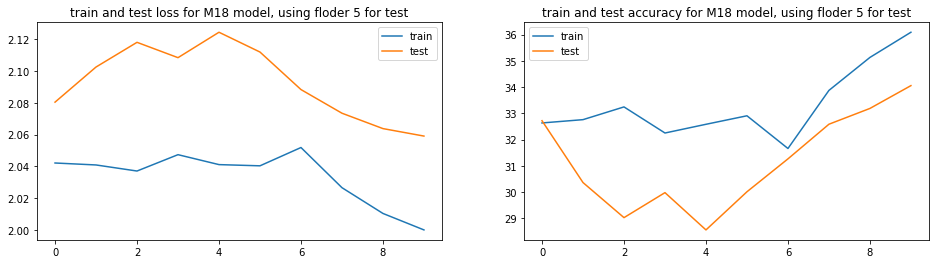

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 2.0337714077996427
loss test 2.0929219260811807
Accuracy train 33.31259758304852
Accuracy test 31.176549145299145


CrossValdation 6, Model : M18
Epoch: 0
Train accuracy: 33.80%
Test accuracy: 30.94%
Epoch: 1
Train accuracy: 34.01%
Test accuracy: 32.99%
Epoch: 2
Train accuracy: 34.43%
Test accuracy: 31.92%
Epoch: 3
Train accuracy: 33.65%
Test accuracy: 33.18%
Epoch: 4
Train accuracy: 34.24%
Test accuracy: 33.21%
Epoch: 5
Train accuracy: 33.92%
Test accuracy: 33.40%
Epoch: 6
Train accuracy: 34.33%
Test accuracy: 34.42%
Epoch: 7
Train accuracy: 35.61%
Test accuracy: 35.36%
Epoch: 8
Train accuracy: 37.55%
Test accuracy: 36.19%
Epoch: 9
Train accuracy: 38.21%
Test accuracy: 36.03%


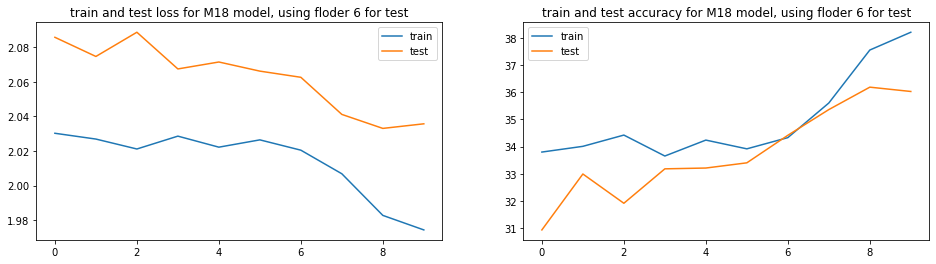

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 2.0140224795187676
loss test 2.062741335800716
Accuracy train 34.97482267489006
Accuracy test 33.76418738289853


CrossValdation 7, Model : M18
Epoch: 0
Train accuracy: 35.48%
Test accuracy: 38.55%
Epoch: 1
Train accuracy: 35.37%
Test accuracy: 40.71%
Epoch: 2
Train accuracy: 34.34%
Test accuracy: 38.08%
Epoch: 3
Train accuracy: 34.05%
Test accuracy: 35.83%
Epoch: 4
Train accuracy: 35.78%
Test accuracy: 39.43%
Epoch: 5
Train accuracy: 36.11%
Test accuracy: 37.40%
Epoch: 6
Train accuracy: 35.98%
Test accuracy: 38.87%
Epoch: 7
Train accuracy: 37.61%
Test accuracy: 41.30%
Epoch: 8
Train accuracy: 38.65%
Test accuracy: 41.03%
Epoch: 9
Train accuracy: 39.36%
Test accuracy: 40.41%


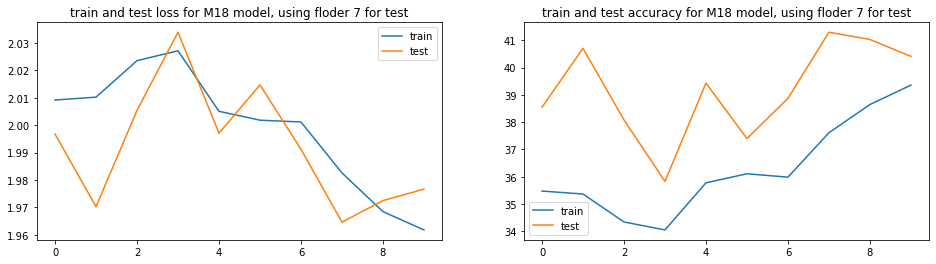

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 1.9991010481311426
loss test 1.9923185638019016
Accuracy train 36.27225894217615
Accuracy test 39.1618545641478


CrossValdation 8, Model : M18
Epoch: 0
Train accuracy: 36.60%
Test accuracy: 34.25%
Epoch: 1
Train accuracy: 35.66%
Test accuracy: 38.75%
Epoch: 2
Train accuracy: 36.96%
Test accuracy: 41.62%
Epoch: 3
Train accuracy: 35.90%
Test accuracy: 39.02%
Epoch: 4
Train accuracy: 36.23%
Test accuracy: 38.62%
Epoch: 5
Train accuracy: 37.81%
Test accuracy: 37.91%
Epoch: 6
Train accuracy: 36.73%
Test accuracy: 38.14%
Epoch: 7
Train accuracy: 38.77%
Test accuracy: 39.37%
Epoch: 8
Train accuracy: 39.73%
Test accuracy: 40.28%
Epoch: 9
Train accuracy: 40.13%
Test accuracy: 39.89%


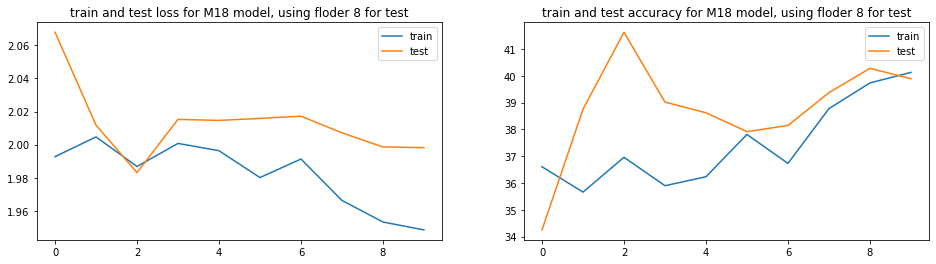

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 1.982075669688563
loss test 2.0129512820925037
Accuracy train 37.45126397929166
Accuracy test 38.78497606471514


CrossValdation 9, Model : M18
Epoch: 0
Train accuracy: 37.01%
Test accuracy: 43.15%
Epoch: 1
Train accuracy: 37.32%
Test accuracy: 43.05%
Epoch: 2
Train accuracy: 36.08%
Test accuracy: 44.84%
Epoch: 3
Train accuracy: 37.14%
Test accuracy: 47.26%
Epoch: 4
Train accuracy: 37.88%
Test accuracy: 46.24%
Epoch: 5
Train accuracy: 38.08%
Test accuracy: 45.51%
Epoch: 6
Train accuracy: 37.35%
Test accuracy: 42.64%
Epoch: 7
Train accuracy: 39.75%
Test accuracy: 46.66%
Epoch: 8
Train accuracy: 40.81%
Test accuracy: 44.20%
Epoch: 9
Train accuracy: 41.54%
Test accuracy: 43.08%


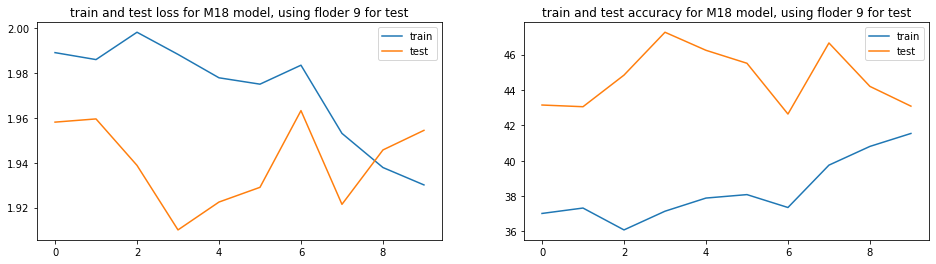

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 1.97197711410061
loss test 1.9403220278876165
Accuracy train 38.29653636321328
Accuracy test 44.66337297476974


CrossValdation 10, Model : M18
Epoch: 0
Train accuracy: 38.41%
Test accuracy: 40.32%
Epoch: 1
Train accuracy: 38.04%
Test accuracy: 39.25%
Epoch: 2
Train accuracy: 37.99%
Test accuracy: 41.77%
Epoch: 3
Train accuracy: 37.74%
Test accuracy: 42.65%
Epoch: 4
Train accuracy: 38.38%
Test accuracy: 42.86%
Epoch: 5
Train accuracy: 39.01%
Test accuracy: 40.92%
Epoch: 6
Train accuracy: 39.50%
Test accuracy: 40.96%
Epoch: 7
Train accuracy: 41.07%
Test accuracy: 41.80%
Epoch: 8
Train accuracy: 43.10%
Test accuracy: 42.34%
Epoch: 9
Train accuracy: 43.74%
Test accuracy: 42.25%


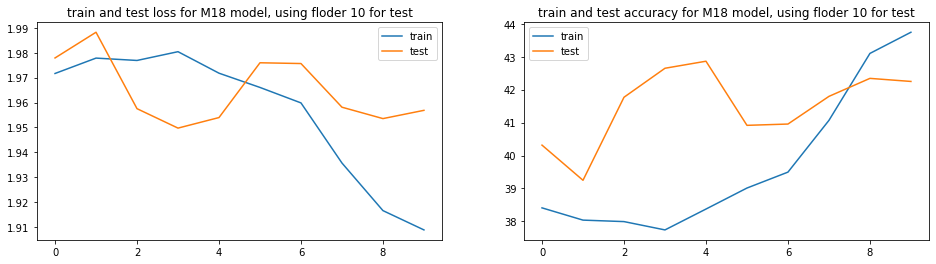

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 1.9565584984517865
loss test 1.9647506441388813
Accuracy train 39.698075669562236
Accuracy test 41.510424824740866




In [14]:
# To train M18 model
model = M18.cuda()
model_train_plot(model,'M18',criterion)


# The Resnet model M34res

In [0]:
# Let's define the class first

class ResNetModule(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        super(ResNetModule, self).__init__()
      
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, stride, padding)
        self.batch1 = nn.BatchNorm1d(out_channels)
        self.relu1  = nn.ReLU()
        
        self.conv2  = nn.Conv1d(out_channels, out_channels, kernel_size, stride, padding)
        self.batch2 = nn.BatchNorm1d(out_channels)
        
        self.batch3 = nn.BatchNorm1d(out_channels)
        self.relu2  = nn.ReLU()
    def forward(self,x):
        x1 = self.conv1(x)
        x1 = self.batch1(x1)
        x1 = self.relu1(x1)
        
        x1 = self.conv2(x1)
        x1 = self.batch2(x1)
        
        # print(x1.shape, x.shape)
        if x1.shape[1] != x.shape[1]:
            x = x.repeat(1,2,1) # repeat with 2 by 2
        
        x = x1 + x
        x = self.batch3(x)
        x = self.relu2(x)
        return x

In [18]:
# To build the M34res model

M34res = nn.Sequential(
    #conv1
    nn.Conv1d(1,48,kernel_size=80, stride=4, padding=38),
    nn.BatchNorm1d(48),
    nn.ReLU(),
 
    nn.MaxPool1d(4),
    
    ResNetModule(48,48,3,padding=1),
    ResNetModule(48,48,3,padding=1),
    ResNetModule(48,48,3,padding=1),
    
    nn.MaxPool1d(4),
    
    ResNetModule(48,96,3,padding=1),
    ResNetModule(96,96,3,padding=1),
    ResNetModule(96,96,3,padding=1),
    ResNetModule(96,96,3,padding=1),
    
    nn.MaxPool1d(4),
    
    ResNetModule(96,192,3,padding=1),
    ResNetModule(192,192,3,padding=1),
    ResNetModule(192,192,3,padding=1),
    ResNetModule(192,192,3,padding=1),
    ResNetModule(192,192,3,padding=1),
    ResNetModule(192,192,3,padding=1),
    
    nn.MaxPool1d(4),
    
    ResNetModule(192,384,3,padding=1),
    ResNetModule(384,384,3,padding=1),
    ResNetModule(384,384,3,padding=1),
    
    nn.AdaptiveAvgPool1d(1),
    nn.Flatten(),
    nn.Linear(384,10)
)
audio = torch.zeros(1,32000)
M34res(audio.unsqueeze(0)).shape


torch.Size([1, 10])

CrossValdation 1, Model : M34res
Epoch: 0
Train accuracy: 27.01%
Test accuracy: 34.34%
Epoch: 1
Train accuracy: 35.75%
Test accuracy: 35.99%
Epoch: 2
Train accuracy: 38.74%
Test accuracy: 44.96%
Epoch: 3
Train accuracy: 42.70%
Test accuracy: 47.93%
Epoch: 4
Train accuracy: 45.66%
Test accuracy: 55.37%
Epoch: 5
Train accuracy: 46.84%
Test accuracy: 51.64%
Epoch: 6
Train accuracy: 48.66%
Test accuracy: 54.21%
Epoch: 7
Train accuracy: 47.82%
Test accuracy: 58.08%
Epoch: 8
Train accuracy: 52.62%
Test accuracy: 59.94%
Epoch: 9
Train accuracy: 54.47%
Test accuracy: 61.92%


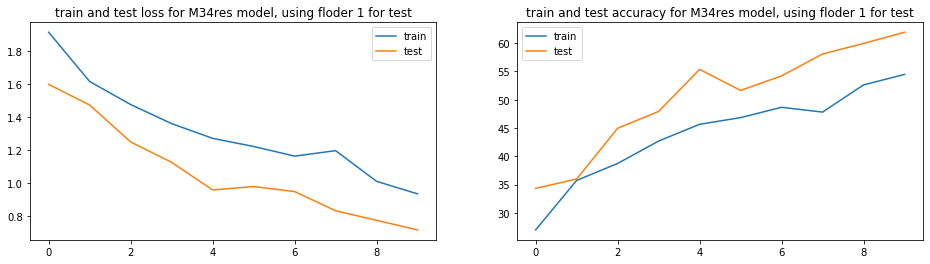

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 1.3167959357085435
loss test 1.0650749274662563
Accuracy train 44.024876670120946
Accuracy test 50.43722395225079


CrossValdation 2, Model : M34res
Epoch: 0
Train accuracy: 50.99%
Test accuracy: 38.26%
Epoch: 1
Train accuracy: 51.33%
Test accuracy: 39.16%
Epoch: 2
Train accuracy: 52.21%
Test accuracy: 38.17%
Epoch: 3
Train accuracy: 52.74%
Test accuracy: 40.31%
Epoch: 4
Train accuracy: 53.82%
Test accuracy: 39.25%
Epoch: 5
Train accuracy: 55.17%
Test accuracy: 38.93%
Epoch: 6
Train accuracy: 54.60%
Test accuracy: 35.29%
Epoch: 7
Train accuracy: 55.73%
Test accuracy: 41.51%
Epoch: 8
Train accuracy: 59.46%
Test accuracy: 40.70%
Epoch: 9
Train accuracy: 60.62%
Test accuracy: 41.06%


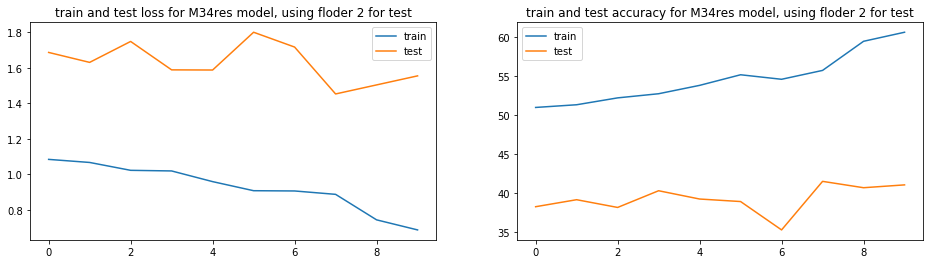

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 0.9274614337951906
loss test 1.6266292640141078
Accuracy train 54.66746959073515
Accuracy test 39.26543712615967


CrossValdation 3, Model : M34res
Epoch: 0
Train accuracy: 55.47%
Test accuracy: 46.48%
Epoch: 1
Train accuracy: 56.21%
Test accuracy: 47.25%
Epoch: 2
Train accuracy: 58.52%
Test accuracy: 44.45%
Epoch: 3
Train accuracy: 58.43%
Test accuracy: 44.21%
Epoch: 4
Train accuracy: 58.89%
Test accuracy: 42.75%
Epoch: 5
Train accuracy: 59.68%
Test accuracy: 42.54%
Epoch: 6
Train accuracy: 59.77%
Test accuracy: 46.12%
Epoch: 7
Train accuracy: 59.59%
Test accuracy: 50.19%
Epoch: 8
Train accuracy: 63.83%
Test accuracy: 49.43%
Epoch: 9
Train accuracy: 65.25%
Test accuracy: 49.01%


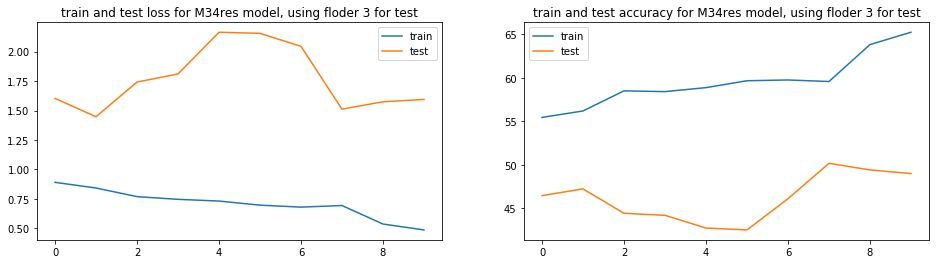

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 0.7079801895579354
loss test 1.7643959835171699
Accuracy train 59.563475978104215
Accuracy test 46.242718877019115


CrossValdation 4, Model : M34res
Epoch: 0
Train accuracy: 59.06%
Test accuracy: 52.43%
Epoch: 1
Train accuracy: 60.75%
Test accuracy: 53.14%
Epoch: 2
Train accuracy: 61.65%
Test accuracy: 54.28%
Epoch: 3
Train accuracy: 62.88%
Test accuracy: 47.10%
Epoch: 4
Train accuracy: 63.48%
Test accuracy: 49.66%
Epoch: 5
Train accuracy: 63.42%
Test accuracy: 49.30%
Epoch: 6
Train accuracy: 64.40%
Test accuracy: 49.16%
Epoch: 7
Train accuracy: 63.64%
Test accuracy: 56.11%
Epoch: 8
Train accuracy: 67.40%
Test accuracy: 57.27%
Epoch: 9
Train accuracy: 69.10%
Test accuracy: 57.05%


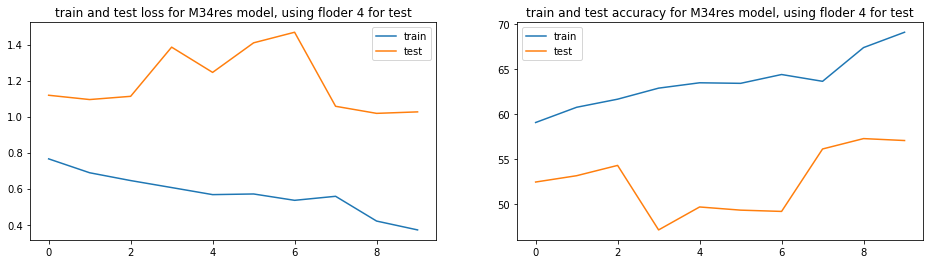

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 0.5725556860693166
loss test 1.1937862396240235
Accuracy train 63.57785561201155
Accuracy test 52.55077358207317


CrossValdation 5, Model : M34res
Epoch: 0
Train accuracy: 61.58%
Test accuracy: 62.58%
Epoch: 1
Train accuracy: 62.16%
Test accuracy: 62.25%
Epoch: 2
Train accuracy: 64.81%
Test accuracy: 63.33%
Epoch: 3
Train accuracy: 65.13%
Test accuracy: 59.86%
Epoch: 4
Train accuracy: 65.61%
Test accuracy: 58.13%
Epoch: 5
Train accuracy: 65.02%
Test accuracy: 60.16%
Epoch: 6
Train accuracy: 65.83%
Test accuracy: 57.81%
Epoch: 7
Train accuracy: 65.78%
Test accuracy: 64.14%
Epoch: 8
Train accuracy: 68.71%
Test accuracy: 64.07%
Epoch: 9
Train accuracy: 70.26%
Test accuracy: 64.65%


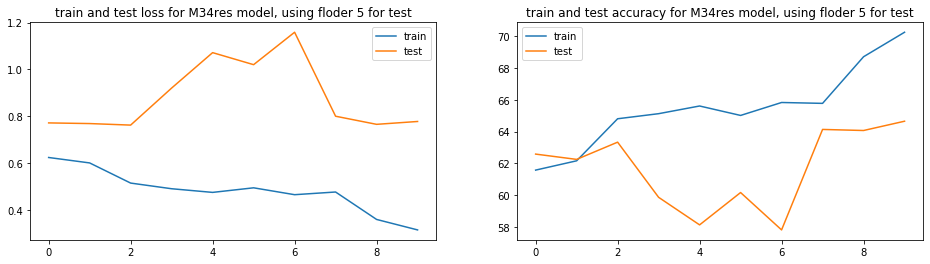

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 0.4819672478271312
loss test 0.8820176359266043
Accuracy train 65.48803486048472
Accuracy test 61.698717948717956


CrossValdation 6, Model : M34res
Epoch: 0
Train accuracy: 64.47%
Test accuracy: 62.89%
Epoch: 1
Train accuracy: 64.73%
Test accuracy: 60.42%
Epoch: 2
Train accuracy: 66.44%
Test accuracy: 62.85%
Epoch: 3
Train accuracy: 68.10%
Test accuracy: 61.90%
Epoch: 4
Train accuracy: 67.10%
Test accuracy: 57.19%
Epoch: 5
Train accuracy: 65.20%
Test accuracy: 57.86%
Epoch: 6
Train accuracy: 67.11%
Test accuracy: 60.80%
Epoch: 7
Train accuracy: 68.11%
Test accuracy: 62.00%
Epoch: 8
Train accuracy: 71.00%
Test accuracy: 61.84%
Epoch: 9
Train accuracy: 71.97%
Test accuracy: 62.63%


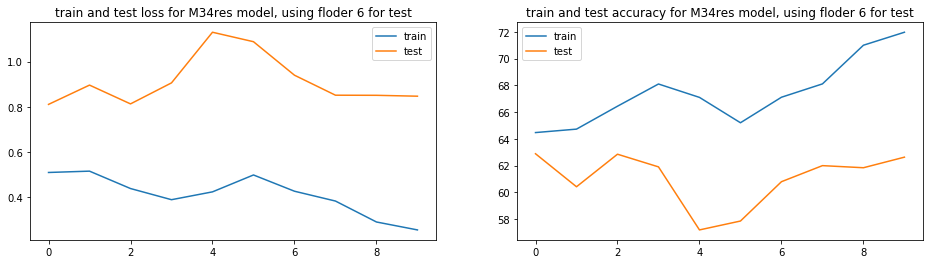

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 0.41366338859642704
loss test 0.9133364864758082
Accuracy train 67.42429392032429
Accuracy test 61.03743246085445


CrossValdation 7, Model : M34res
Epoch: 0
Train accuracy: 67.49%
Test accuracy: 59.88%
Epoch: 1
Train accuracy: 67.97%
Test accuracy: 62.58%
Epoch: 2
Train accuracy: 68.79%
Test accuracy: 61.49%
Epoch: 3
Train accuracy: 69.84%
Test accuracy: 63.37%
Epoch: 4
Train accuracy: 70.09%
Test accuracy: 62.10%
Epoch: 5
Train accuracy: 69.23%
Test accuracy: 61.10%
Epoch: 6
Train accuracy: 69.53%
Test accuracy: 64.86%
Epoch: 7
Train accuracy: 69.08%
Test accuracy: 68.17%
Epoch: 8
Train accuracy: 72.26%
Test accuracy: 67.25%
Epoch: 9
Train accuracy: 73.61%
Test accuracy: 67.15%


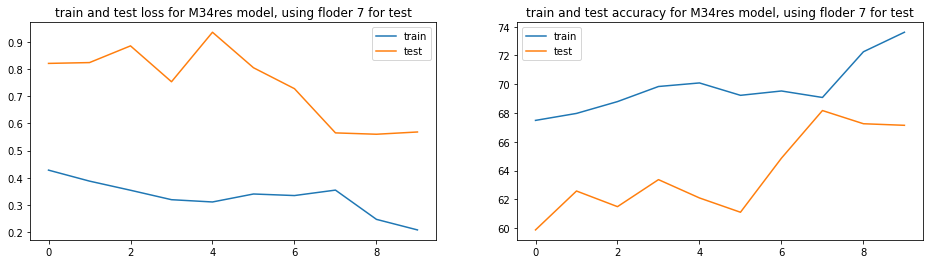

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 0.3280191809780174
loss test 0.7450684377125331
Accuracy train 69.78930674113894
Accuracy test 63.795602020045166


CrossValdation 8, Model : M34res
Epoch: 0
Train accuracy: 67.30%
Test accuracy: 71.47%
Epoch: 1
Train accuracy: 69.03%
Test accuracy: 68.49%
Epoch: 2
Train accuracy: 70.54%
Test accuracy: 70.43%
Epoch: 3
Train accuracy: 67.87%
Test accuracy: 63.97%
Epoch: 4
Train accuracy: 66.57%
Test accuracy: 63.15%
Epoch: 5
Train accuracy: 69.31%
Test accuracy: 63.90%
Epoch: 6
Train accuracy: 70.37%
Test accuracy: 66.05%
Epoch: 7
Train accuracy: 70.37%
Test accuracy: 64.79%
Epoch: 8
Train accuracy: 72.72%
Test accuracy: 63.86%
Epoch: 9
Train accuracy: 73.92%
Test accuracy: 63.86%


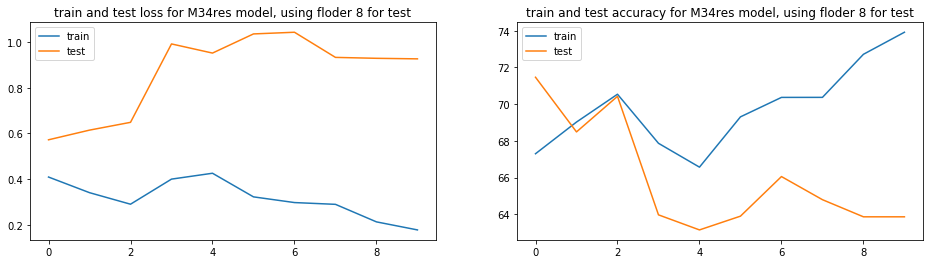

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 0.316953768040384
loss test 0.8646984117371694
Accuracy train 69.79886050420428
Accuracy test 65.99659609735454


CrossValdation 9, Model : M34res
Epoch: 0
Train accuracy: 68.17%
Test accuracy: 72.51%
Epoch: 1
Train accuracy: 70.50%
Test accuracy: 70.37%
Epoch: 2
Train accuracy: 70.65%
Test accuracy: 69.99%
Epoch: 3
Train accuracy: 71.12%
Test accuracy: 70.37%
Epoch: 4
Train accuracy: 71.25%
Test accuracy: 70.21%
Epoch: 5
Train accuracy: 71.67%
Test accuracy: 67.40%
Epoch: 6
Train accuracy: 71.92%
Test accuracy: 67.47%
Epoch: 7
Train accuracy: 70.65%
Test accuracy: 68.30%
Epoch: 8
Train accuracy: 73.72%
Test accuracy: 68.26%
Epoch: 9
Train accuracy: 74.84%
Test accuracy: 67.82%


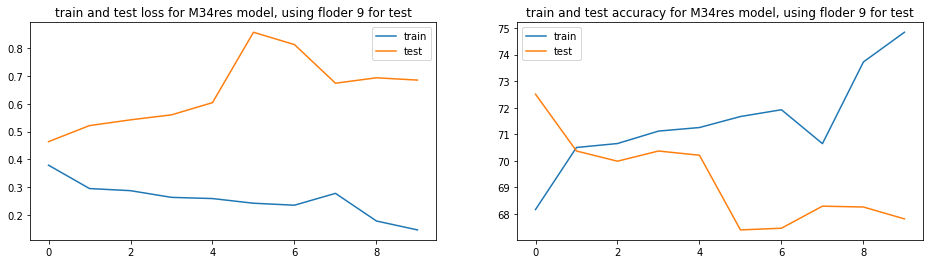

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 0.25622334897277815
loss test 0.6411869602543968
Accuracy train 71.44899918612596
Accuracy test 69.268918317907


CrossValdation 10, Model : M34res
Epoch: 0
Train accuracy: 70.44%
Test accuracy: 70.03%
Epoch: 1
Train accuracy: 70.34%
Test accuracy: 70.93%
Epoch: 2
Train accuracy: 71.82%
Test accuracy: 71.19%
Epoch: 3
Train accuracy: 72.43%
Test accuracy: 70.25%
Epoch: 4
Train accuracy: 72.31%
Test accuracy: 68.47%
Epoch: 5
Train accuracy: 72.75%
Test accuracy: 68.03%
Epoch: 6
Train accuracy: 72.63%
Test accuracy: 66.42%
Epoch: 7
Train accuracy: 71.05%
Test accuracy: 67.61%
Epoch: 8
Train accuracy: 74.62%
Test accuracy: 68.65%
Epoch: 9
Train accuracy: 75.55%
Test accuracy: 68.85%


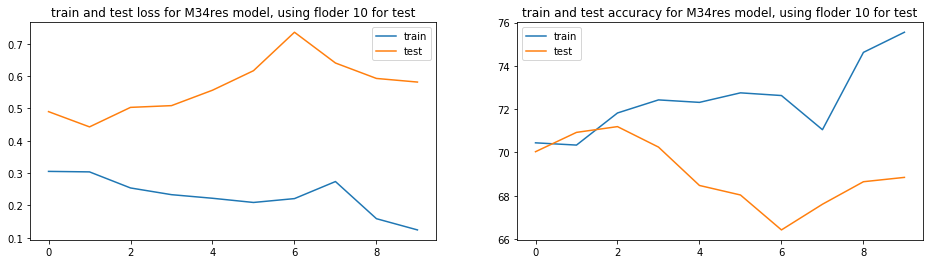

AVERAGE ACCURACY AND LOSS VALUE FOR TRAINNING AND TEST SET
loss train 0.2304477233860281
loss test 0.566610729268619
Accuracy train 72.39473002979165
Accuracy test 69.04227371853882




In [19]:
# To train M34res model
model = M34res.cuda()
model_train_plot(model,'M34res',criterion)


In [0]:
# Summary of the test accuracy of all the architectures

In [21]:
dict={'Model':['M3','M5','M11','M18','M34res'],'Test':[38.36, 48.32, 45.17, 41.51, 69.04]}
mod = pd.DataFrame(dict)
mod

,Model,Test
0,M3,38.36
1,M5,48.32
2,M11,45.17
3,M18,41.51
4,M34res,69.04
